### Plotting proportions of cell types across ileum in the atlas to compare to bulkRNAseq

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex

In [2]:
adata = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/pooled_healthy_disease.remapped.allgenes.fine_annot.no_doublets.20230322.h5ad')

In [107]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [3]:
adata

AnnData object with n_obs × n_vars = 1358576 × 36601
    var: 'gene_ids', 'feature_type', 'mito', 'ribo', 'hb', 'cc', 'ig', 'tcr', 'n_counts-0', 'n_counts_raw-0', 'n_counts_spliced-0', 'n_counts_unspliced-0', 'n_cells-0', 'n_cells_raw-0', 'n_cells_spliced-0', 'n_cells_unspliced-0', 'n_counts-1', 'n_counts_raw-1', 'n_counts_spliced-1', 'n_counts_unspliced-1', 'n_cells-1', 'n_cells_raw-1', 'n_cells_spliced-1', 'n_cells_unspliced-1'
    uns: 'age_unified_colors', 'control_vs_disease_colors', 'disease_colors', 'level_1_annot_colors', 'level_3_annot_colors', 'neighbors', 'organ_groups_colors', 'organ_unified_colors', 'study_colors', 'umap'
    obsm: 'X_mde', 'X_scANVI', 'X_umap', '_scvi_extra_continuous_covs'
    obsp: 'connectivities', 'distances'

In [4]:
adata.obs = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/metadata/pooled_healthy_disease.remapped.allgenes.fine_annot.no_doublets.20230322.csv',index_col=0)

/home/jovyan/my-conda-envs/standard_plotting/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (73,82,83,84,86,93,102,105,112,113,114,115,117,119) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
adata

AnnData object with n_obs × n_vars = 1358576 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_s

In [6]:
si = adata[adata.obs.organ_groups.isin(['Small_intestine'])].copy()

In [7]:
adata.obs.donor_category.value_counts()

control    734105
inutero    333624
disease    281335
preterm      9512
Name: donor_category, dtype: int64

In [8]:
si_adult = si[si.obs.donor_category.isin(['control','disease'])].copy()

In [9]:
si_adult

AnnData object with n_obs × n_vars = 255591 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_sp

In [10]:
ileum_adult = si_adult[si_adult.obs.organ_unified.isin(['ileum'])].copy()

In [11]:
ileum_adult.obs.organ_unified.value_counts()

ileum    180343
Name: organ_unified, dtype: int64

In [12]:
ileum_adult.obs.age_unified.value_counts()

55-74    22666
4-7      20377
13-17    20284
9-12     18372
18-34    17375
75+      14906
35-54     1636
Name: age_unified, dtype: int64

In [13]:
ileum_adult.obs.disease.value_counts()

control                   47324
crohns_disease            41669
neighbouring_inflammed    37964
pediatric_IBD             29594
neighbouring_polyps       15648
neighbouring_cancer        8144
Name: disease, dtype: int64

In [14]:
iad = ileum_adult[ileum_adult.obs.disease.isin(['control','crohns_disease','pediatric_IBD'])].copy()

In [15]:
iad.obs.disease.value_counts()

control           47324
crohns_disease    41669
pediatric_IBD     29594
Name: disease, dtype: int64

In [16]:
level1_palette={
'Epithelial':'#f1bd51',
'Mesenchymal':'#f269a4',
'T and NK cells':'#8bba56',
'B and B plasma':'#60b494',
'Endothelial':'#e98345',
'Myeloid':'#938ec4',
'Neural':'#be9351'
}


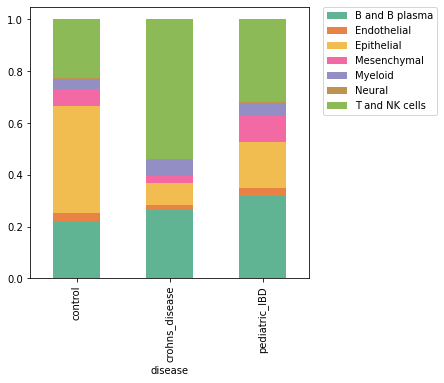

In [160]:
plt.rcParams['figure.figsize'] = [5,5]
tmp = pd.crosstab(iad.obs['disease'], iad.obs['level_1_annot'],normalize='index'
                                                                         )
tmp.plot.bar(stacked=True,color=level1_palette).legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig('/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/MUC6_proportions/figures/level_1_annot_disease_prop.pdf')

In [24]:
list(iad.obs['level_3_annot'].unique())

['B_naive',
 'Tfh_naive',
 'NK_CD56bright',
 'B_memory',
 'Tnaive/cm_CD8',
 'Tnaive/cm_CD4',
 'Monocyte',
 'Trm/em_CD8',
 'B_plasma_IgG',
 'Trm_CD4',
 'NK_CD16',
 'Trm_CD8',
 'Macrophage',
 'MAIT',
 'Treg_IL10',
 'Macrophage_MMP9',
 'Trm_Th17',
 'EC_lymphatic',
 'T/NK_cycling',
 'EC_arterial_2',
 'Treg',
 'Macrophage_CD5L',
 'ILC3',
 'EC_arterial_1',
 'B_plasmablast',
 'DC_cDC1',
 'gdT',
 'Tfh',
 'Oesophagus_fibroblast',
 'DC_cDC2',
 'Macrophage_TREM2',
 'B_plasma_IgA1',
 'Lamina_propria_fibroblast_ADAMDEC1',
 'B_plasma_IgA2',
 'Mono/neutrophil_MPO',
 'EC_capillary',
 'Vascular_smooth_muscle',
 'Macrophage_LYVE1',
 'B_preB',
 'EC_venous',
 'gdT_naive',
 'B_GC_I',
 'TA',
 'Megakaryocyte/platelet',
 'B_proB',
 'Mast',
 'B_plasma_IgM',
 'B_GC_II',
 'Pericyte',
 'DC_migratory',
 'Crypt_fibroblast_PI16',
 'Microfold',
 'Enterocyte',
 'Epithelial_stem',
 'Immune_recruiting_pericyte',
 'Follicular_DC',
 'Glial_3',
 'Goblet_cycling',
 'Villus_fibroblast_F3',
 'Goblet_progenitor',
 'BEST4_enter

In [208]:
column_order = [#B and B plasma
   'B_GC_I','B_GC_II','B_memory','B_naive','B_plasma_IgA1','B_plasma_IgA2',
    'B_plasma_IgG','B_plasma_IgM','B_plasmablast','B_preB','B_proB',
    
    #endothelial
    'EC_arterial_1',
'EC_arterial_2',
'EC_capillary',
'EC_cycling',
'EC_lymphatic',
'EC_venous',
    
    #epithelial
   'BEST4_enterocyte_colonocyte','Enterocyte','Enteroendocrine',
    'Epithelial_stem','Goblet','Goblet_cycling','Goblet_progenitor',
    'Microfold','Mucous_gland_neck','Paneth','Surface_foveolar','TA','Tuft',
    
    #mesenchymal
    'Crypt_fibroblast_PI16',
'Fibroblast_reticular',
'Follicular_DC',
'Immune_recruiting_pericyte',
'Lamina_propria_fibroblast_ADAMDEC1',
'Mesothelium',
'Myofibroblast',
'Oesophagus_fibroblast',
'Oral_mucosa_fibroblast',
'Pericyte',
'Rectum_fibroblast',
'Vascular_smooth_muscle',
'Villus_fibroblast_F3',
    
    #myeloid
 'DC_cDC1',
'DC_cDC2',
'DC_langerhans',
'DC_migratory',
'DC_pDC',
'Eosinophil/basophil',
'Erythrocytes',
'Macrophage',
'Macrophage_CD5L',
'Macrophage_LYVE1',
'Macrophage_MMP9',
'Macrophage_TREM2',
'Mast',
'Megakaryocyte/platelet',
'Mono/neutrophil_MPO',
'Monocyte',

    
    #neural
    'Enteric_neural_crest_cycling','Glial/Enteric_neural_crest',
    'Glial_1','Glial_2','Glial_3','Neuroblast',

    
    
    #T and NK cells
     'ILC3','MAIT','NK_CD16','NK_CD56bright','T/NK_cycling','Tfh','Tfh_naive',
    'Tnaive/cm_CD4','Tnaive/cm_CD8','Treg','Treg_IL10','Trm/em_CD8',
    'Trm_CD4','Trm_CD8','Trm_Th17','gdT','gdT_naive'

]

In [209]:
iad.obs['level_3_annot'] = iad.obs['level_3_annot'].astype('category')

In [210]:
iad.obs['level_3_annot'].cat.reorder_categories(column_order, inplace=True)

<ipython-input-210-826490259e13>:1: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  iad.obs['level_3_annot'].cat.reorder_categories(column_order, inplace=True)


In [211]:
level3_palette={'EC_venous': '#2a4858',
  'Mast': '#826e91',
  'EC_capillary': '#855f9a',
  'DC_cDC1': '#8c543f',
  'Monocyte': '#5baf07',
  'DC_cDC2': '#cfdb65',
  'Basal': '#727271',
  'Treg_IL10': '#e5c510',
  'Crypt_fibroblast_PI16': '#bd7879',
  'Macrophage': '#486626',
  'Vascular_smooth_muscle': '#1E4147',
  'Lamina_propria_fibroblast_ADAMDEC1': '#e95e50',
  'Epithelial_cycling_G2M': '#ff3c4b',
  'Keratinocyte_stratified': '#EDD3E0',
  'Trm/em_CD8': '#256b87',
  'Pericyte': '#437356',
  'Oral_mucosa_fibroblast': '#303267',
  'Macrophage_MMP9': '#a5f002',
  'EC_lymphatic': '#999999',
  'Rectum_fibroblast': '#522e25',
  'Trm_Th17': '#1e093f',
  'DC_migratory': '#e6a519',
  'Epithelial_cycling_S': '#ff8433',
  'Trm_CD4': '#8107ed',
  'NK_CD16': '#0c1e0e',
  'Macrophage_LYVE1': '#8fd9d0',
  'Trm_CD8': '#2844c1',
  'Macrophage_TREM2': '#42c7ac',
  'Keratinocyte_inflammatory': '#E0AC9D',
  'Tnaive/cm_CD4': '#9c53bc',
  'DC_pDC': '#bdb197',
  'Villus_fibroblast_F3': '#d64582',
  'EC_arterial_2': '#ca6092',
  'EC_arterial_1': '#fa6e6e',
  'gdT': '#3fafb5',
  'B_memory': '#a33c22',
  'T/NK_cycling': '#c260ff',
  'Immune_recruiting_pericyte': '#AAC789',
  'MAIT': '#21b796',
  'ILC3': '#778c00',
  'Melanocyte': '#886F61',
  'Tfh_naive': '#5e3c55',
  'Keratinocyte_outer': '#BF7A9C',
  'EC_cycling': '#fac06e',
  'Tnaive/cm_CD8': '#5ca4ce',
  'NK_CD56bright': '#3f8c08',
  'B_naive': '#9b0319',
  'B_preB': '#8a4682',
  'Treg': '#f98261',
  'B_proB': '#d34794',
  'B_plasmablast': '#9e53db',
  'B_plasma_IgG': '#632f17',
  'Megakaryocyte/platelet': '#c730aa',
  'TA': '#b85f1c',
  'Mono/neutrophil_MPO': '#2a497a',
  'B_plasma_IgA1': '#f76c56',
  'Macrophage_CD5L': '#caf9cf',
  'Tfh': '#5e0b30',
  'Oesophagus_fibroblast': '#63A0C0',
  'B_plasma_IgA2': '#d6558d',
  'gdT_naive': '#26daf2',
  'B_GC_I': '#db9602',
  'B_plasma_IgM': '#c66d31',
  'DC_langerhans': '#c7a642',
  'Fibroblast_reticular': '#f0c134',
  'B_GC_II': '#e2d138',
  'Follicular_DC': '#f0982c',
  'Microfold': '#e55b85',
  'Enterocyte': '#e1b5e6',
  'Epithelial_stem': '#c924b9',
  'Surface_foveolar': '#d9b74a',
  'Mucous_gland_neck': '#f7b37c',
  'Cycling': '#ff8433',
  'Pareital': '#d45f80',
  'Enteroendocrine_MX': '#292663',
  'Myofibroblast': '#CCAE91',
  'Glial_2': '#0D6986',
  'Enteric_neural_crest_cycling': '#DBA507',
  'Enterochromaffin': '#22517a',
  'Chief': '#c95340',
  'Glial/Enteric_neural_crest': '#a8c545',
  'Enteroendocrine_G': '#2f3f4d',
  'Neuroblast': '#c50637',
  'Goblet_progenitor': '#e9f7ad',
  'Goblet': '#6c9939',
  'Enteroendocrine': '#68b7fc',
  'Erythrocytes': '#0e539c',
  'Enteroendocrine_X': '#7292ad',
  'Glial_3': '#053240',
  'Goblet_cycling': '#d1d14f',
  'BEST4_enterocyte_colonocyte': '#39997c',
  'Tuft': '#9d9dff',
  'Paneth': '#79508f',
  'Serous': '#C9DE55',
  'Mucous': '#67cc8e',
  'Duct': '#7D9100',
  'Seromucous': '#ACEBAE',
  'Myoepithelial': '#572300',
  'Ionocytes': '#9d9dff',
  'Colonocyte': '#d66245',
  'Mature_colonocyte': '#fa6161',
  'Mesoderm_2': '#b4793b',
  'Branch_A_inhibtory_motor_neuron': '#a39bcb',
  'SMC_PPLP2': '#d4d4e8',
  'Cycling_fibroblast': '#d65151',
  'ICC': '#69479b',
  'Branch_B_excitatory_motor_neuron': '#496695',
  'SMC_CAPN3': '#968dc6',
  'Mesoderm_1': '#663818',
  'Branch_B_primary_afferent_neuron': '#909134',
  'Proximal_progenitor_DUO/JEJ': '#fac219',
  'SMC_CAPN3_cycling': '#76738e',
  'Glial_1': '#8EC7D2',
  'Branch_A_primary_afferent_neuron': '#27bdbf',
  'Branch_A_interneuron': '#67608a',
  'NTS': '#baada4',
  'Proximal_progenitor_ILE': '#8f6e0d',
  'Enteroendocrine_progenitor': '#aeebdf',
  'Mesothelium': '#8F6592',
  'Distal_progenitor': '#dbc697',
  'Angiogenic_pericyte': '#308587',
  'Eosinophil/basophil': '#8b4eba',
  'CLDN10': '#706d65',
  'Distal_progenitor_PRAC1': '#8f8161',
  'Immature_pericyte': '#90c496',
  'Mesenchymal_LTO': '#f7eb59',
  'Gastric_fetal_epithelial': '#a01160',
  'DCS_MUC17_cycling': '#99216b',
  'DCS_MUC17': '#9c6b73',
  'Gland_basal': '#404040',
  'Gland_fetal': '#168039',
  'Basal_cycling': '#d1bf82',
  'Keratinocyte_fetal': '#d8306e',
  'Gland_duct': '#7D9100',
  'Gland_mucous': '#67cc8e',
  'Myoblast/myocyte': '#e2798d',
  'Unknown': '#000000'}


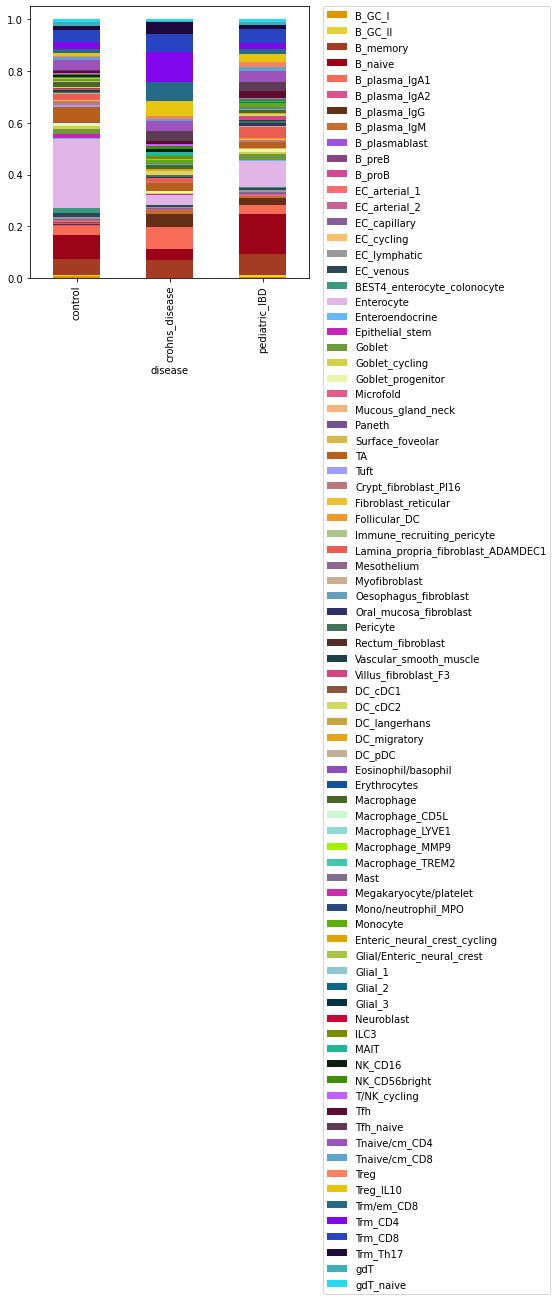

In [212]:
tmp = pd.crosstab(iad.obs['disease'], iad.obs['level_3_annot'],normalize='index'
                                                                         )
tmp.plot.bar(stacked=True,color=level3_palette).legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig('/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/MUC6_proportions/figures/level_3_annot_disease_prop.pdf')

In [214]:
tmp = pd.crosstab(iad.obs['disease'], iad.obs['level_3_annot'],normalize='index'
                                                                         )

In [216]:
tmp.to_csv('~/data.csv')

In [166]:
iad.obs['disease_donorID'] = iad.obs.disease.astype(str) + '_' + iad.obs.donorID_unified.astype(str)

In [167]:
iad.obs['disease_donorID']

index
AAACCTGAGAAGGTGA-HCA_A_GT12934999           control_D105
AAACCTGAGAGACTTA-HCA_A_GT12934999           control_D105
AAACCTGAGCTAACAA-HCA_A_GT12934999           control_D105
AAACCTGCAGATCTGT-HCA_A_GT12934999           control_D105
AAACCTGCAGTCGTGC-HCA_A_GT12934999           control_D105
                                            ...         
TTTGTCAAGTTACCCA-GSM4766849          crohns_disease_D141
TTTGTCACAATCGAAA-GSM4766849          crohns_disease_D141
TTTGTCACACCATCCT-GSM4766849          crohns_disease_D141
TTTGTCAGTTCCCGAG-GSM4766849          crohns_disease_D141
TTTGTCATCGGCGGTT-GSM4766849          crohns_disease_D141
Name: disease_donorID, Length: 118587, dtype: object

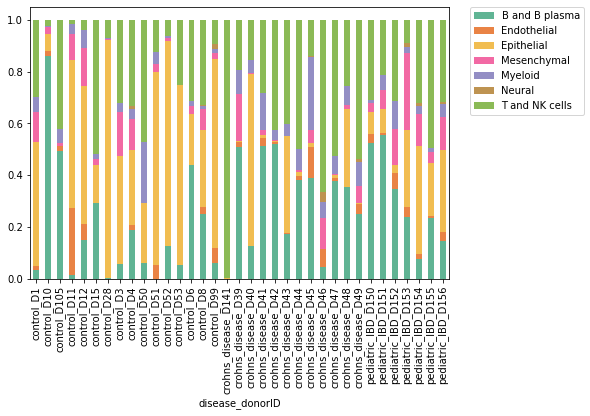

In [168]:
plt.rcParams['figure.figsize'] = [7.5,5]
tmp = pd.crosstab(iad.obs['disease_donorID'], iad.obs['level_1_annot'],normalize='index'
                                                                         )
tmp.plot.bar(stacked=True,color=level1_palette).legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig('/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/MUC6_proportions/figures/level_1_annot_disease_donorID_prop.pdf')

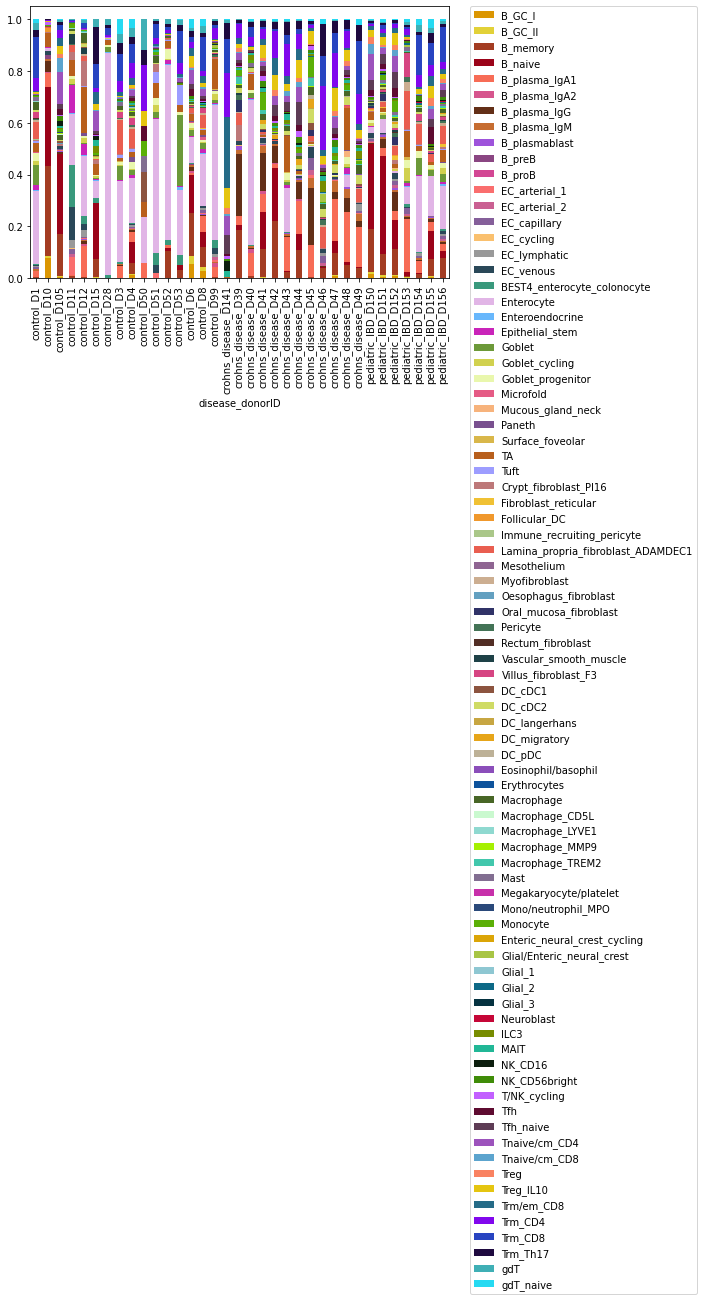

In [213]:
plt.rcParams['figure.figsize'] = [7.5,5]
tmp = pd.crosstab(iad.obs['disease_donorID'], iad.obs['level_3_annot'],normalize='index'
                                                                         )
tmp.plot.bar(stacked=True,color=level3_palette).legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig('/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/MUC6_proportions/figures/level_3_annot_disease_donorID_prop.pdf')

In [170]:
## create similar plots for the bulk deconvolution proportions from Ruoyan

In [171]:
level3_GSE = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/MUC6_proportions/deconv_proportion_level3_GSE111889_new_sc_ref.csv',index_col=0) 
level3_E_MTAB = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/MUC6_proportions/deconv_proportion_level3_E_MTAB_5464_new_sc_ref.csv',index_col=0) 
level3_E_GEOD = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/MUC6_proportions/deconv_proportion_level3_E_CEOD_101794_new_sc_ref.csv',index_col=0) 

In [172]:
level3_GSE

,Trm_Th17,Trm/em_CD8,Tfh_naive,B_plasma_IgA1,TA,Enterocyte,ILC3,Treg_IL10,Goblet_progenitor,Monocyte,...,Glial_2,Neuroblast,Macrophage_LYVE1,DC_langerhans,Glial_1,Oesophagus_fibroblast,Immune_recruiting_pericyte,Rectum_fibroblast,EC_cycling,Erythrocytes
CD_CSM5FZ1F,0.000003,0.000003,4.976976e-07,9.917840e-07,1.559674e-01,0.605168,0.000001,1.573325e-06,0.000019,9.496578e-03,...,1.373276e-05,9.493208e-07,0.009546,0.000002,0.000010,6.120680e-05,0.000002,3.262709e-07,0.000002,2.063501e-02
CD_CSM5FZ22,0.000003,0.000002,1.327704e-06,6.365930e-07,8.990535e-07,0.839300,0.000001,1.134526e-06,0.000001,5.306814e-07,...,7.086790e-07,6.510039e-04,0.018310,0.000001,0.000003,8.066145e-07,0.000002,1.123811e-06,0.000001,3.711337e-07
CD_CSM5FZ27,0.000003,0.000001,2.316841e-06,1.378226e-06,2.508334e-06,0.816772,0.000002,7.252029e-07,0.000014,4.014375e-07,...,7.112819e-07,4.085633e-06,0.017383,0.000003,0.000005,1.863756e-06,0.000006,2.747853e-05,0.000010,2.593737e-07
CD_CSM5FZ2D,0.001423,0.000004,4.511783e-06,2.652438e-06,8.540133e-02,0.476136,0.000004,9.533337e-04,0.000003,4.065779e-03,...,8.273879e-05,4.364156e-04,0.022882,0.000002,0.004185,1.785087e-03,0.000045,3.694889e-06,0.000003,1.707169e-02
CD_CSM5FZ2O,0.000027,0.000002,4.540090e-06,2.579929e-06,5.813454e-06,0.687890,0.000021,1.755728e-06,0.000002,7.202227e-07,...,2.143117e-06,1.332708e-03,0.026052,0.000003,0.000151,2.805757e-06,0.000002,1.901798e-05,0.000002,3.885268e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CD_PSM6XBZY,0.000002,0.000008,4.271816e-06,4.340337e-06,7.579806e-02,0.035537,0.000284,1.421071e-06,0.000700,2.201604e-06,...,5.230641e-06,2.776028e-04,0.015214,0.000002,0.002190,7.348040e-04,0.000015,2.352684e-03,0.003340,5.907667e-04
normal_PSM6XC11,0.000016,0.000003,9.344249e-05,1.190519e-06,1.906662e-06,0.587188,0.000270,1.866902e-06,0.000002,9.193865e-07,...,1.258166e-06,2.636917e-03,0.034185,0.001682,0.000861,1.187679e-03,0.000013,3.018145e-06,0.000038,6.908363e-07
normal_PSM6XC13,0.000027,0.000018,1.062700e-05,1.243041e-06,1.882713e-06,0.575626,0.000014,9.105031e-06,0.000114,1.285911e-06,...,1.292786e-06,2.454169e-03,0.044759,0.001508,0.004605,4.517704e-06,0.000006,5.218729e-06,0.000001,6.342979e-07
CD_PSM7J4EV,0.000454,0.002994,4.956185e-06,2.167901e-06,2.090121e-02,0.542163,0.000002,9.492292e-06,0.002193,6.002320e-07,...,3.086505e-06,1.646259e-05,0.035420,0.000031,0.003199,1.486653e-05,0.000026,3.020445e-03,0.000003,3.343827e-07


In [173]:
df = level3_GSE.reindex(sorted(level3_GSE.columns), axis=1)

In [174]:
df

,BEST4_enterocyte_colonocyte,B_GC_I,B_GC_II,B_memory,B_naive,B_plasma_IgA1,B_plasma_IgA2,B_plasma_IgG,B_plasma_IgM,B_plasmablast,...,Treg_IL10,Trm/em_CD8,Trm_CD4,Trm_CD8,Trm_Th17,Tuft,Vascular_smooth_muscle,Villus_fibroblast_F3,gdT,gdT_naive
CD_CSM5FZ1F,2.122953e-06,7.541267e-07,0.000002,1.042593e-06,7.195616e-05,9.917840e-07,1.033208e-06,2.903537e-06,9.994376e-07,2.703451e-06,...,1.573325e-06,0.000003,0.000001,0.000002,0.000003,0.001326,5.593865e-07,0.000017,0.001008,0.000002
CD_CSM5FZ22,3.631470e-04,6.342393e-03,0.000001,8.600557e-07,1.060137e-06,6.365930e-07,5.051526e-07,3.730402e-07,7.555704e-07,6.678124e-07,...,1.134526e-06,0.000002,0.000004,0.000638,0.000003,0.010139,6.777673e-07,0.003429,0.005434,0.000006
CD_CSM5FZ27,3.784218e-04,1.413870e-02,0.000001,9.291720e-07,7.513799e-07,1.378226e-06,7.779781e-07,7.507800e-07,1.377296e-06,3.132440e-06,...,7.252029e-07,0.000001,0.000003,0.000733,0.000003,0.009295,5.575464e-07,0.005030,0.005905,0.000062
CD_CSM5FZ2D,1.435731e-04,5.347420e-06,0.012397,7.128151e-05,2.032147e-04,2.652438e-06,2.886597e-06,1.034559e-05,6.365982e-06,1.516818e-06,...,9.533337e-04,0.000004,0.000004,0.000007,0.001423,0.017045,8.711205e-07,0.003344,0.004062,0.000043
CD_CSM5FZ2O,9.720177e-04,1.499523e-02,0.000002,1.644949e-06,7.113304e-07,2.579929e-06,1.807564e-06,1.064379e-06,3.476874e-06,1.727543e-06,...,1.755728e-06,0.000002,0.000003,0.000532,0.000027,0.014400,1.201901e-06,0.007187,0.008146,0.000025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CD_PSM6XBZY,2.854343e-03,9.409560e-03,0.000005,2.287812e-06,2.835326e-03,4.340337e-06,2.328797e-06,1.299073e-06,4.195228e-06,2.312488e-04,...,1.421071e-06,0.000008,0.000103,0.000563,0.000002,0.006760,3.350859e-06,0.003711,0.000154,0.001062
normal_PSM6XC11,4.151485e-04,6.654989e-03,0.055413,2.091645e-02,1.107872e-03,1.190519e-06,8.703641e-07,1.087352e-06,2.210290e-06,2.222492e-06,...,1.866902e-06,0.000003,0.000019,0.000159,0.000016,0.021903,8.862129e-06,0.004908,0.011595,0.001639
normal_PSM6XC13,3.469076e-06,1.601272e-02,0.035707,1.436572e-02,3.914876e-06,1.243041e-06,1.019335e-06,1.008142e-06,1.136356e-06,5.538040e-07,...,9.105031e-06,0.000018,0.000005,0.000009,0.000027,0.018619,1.522153e-06,0.006048,0.010329,0.000039
CD_PSM7J4EV,1.385819e-06,1.524458e-02,0.004532,1.459392e-04,8.162605e-03,2.167901e-06,3.462861e-06,3.340211e-06,4.355267e-06,5.018194e-06,...,9.492292e-06,0.002994,0.000003,0.000017,0.000454,0.015161,7.964050e-07,0.007314,0.012495,0.000010


In [175]:
df = df.sort_index(ascending=False)

In [176]:
column_order = [#B and B plasma
   'B_GC_I','B_GC_II','B_memory','B_naive','B_plasma_IgA1','B_plasma_IgA2',
    'B_plasma_IgG','B_plasma_IgM','B_plasmablast',
    
    #endothelial
    'EC_arterial_1',
'EC_arterial_2',
'EC_capillary',
'EC_cycling',
'EC_lymphatic',
'EC_venous',
    
    #epithelial
   'BEST4_enterocyte_colonocyte','Enterocyte','Enteroendocrine',
    'Epithelial_stem','Goblet','Goblet_cycling','Goblet_progenitor',
    'Microfold','Mucous_gland_neck','Paneth','Surface_foveolar','TA','Tuft',
    
    #mesenchymal
    'Crypt_fibroblast_PI16',
'Fibroblast_reticular',
'Follicular_DC',
'Immune_recruiting_pericyte',
'Lamina_propria_fibroblast_ADAMDEC1',
'Myofibroblast',
'Oesophagus_fibroblast',
'Oral_mucosa_fibroblast',
'Pericyte',
'Rectum_fibroblast',
'Vascular_smooth_muscle',
'Villus_fibroblast_F3',
    
    #myeloid
 'DC_cDC1',
'DC_cDC2',
'DC_langerhans',
'DC_migratory',
'DC_pDC',
'Eosinophil/basophil',
'Erythrocytes',
'Macrophage',
'Macrophage_LYVE1',
'Macrophage_MMP9',
'Macrophage_TREM2',
'Mast',
'Monocyte',
    
    #neural
    'Glial/Enteric_neural_crest',
    'Glial_1','Glial_2','Neuroblast',

    
    
    #T and NK cells
     'ILC3','MAIT','NK_CD16','NK_CD56bright','T/NK_cycling','Tfh','Tfh_naive',
    'Tnaive/cm_CD4','Tnaive/cm_CD8','Treg','Treg_IL10','Trm/em_CD8',
    'Trm_CD4','Trm_CD8','Trm_Th17','gdT','gdT_naive'

]

In [177]:
df = df[column_order]
df = df.sort_index(ascending=False)

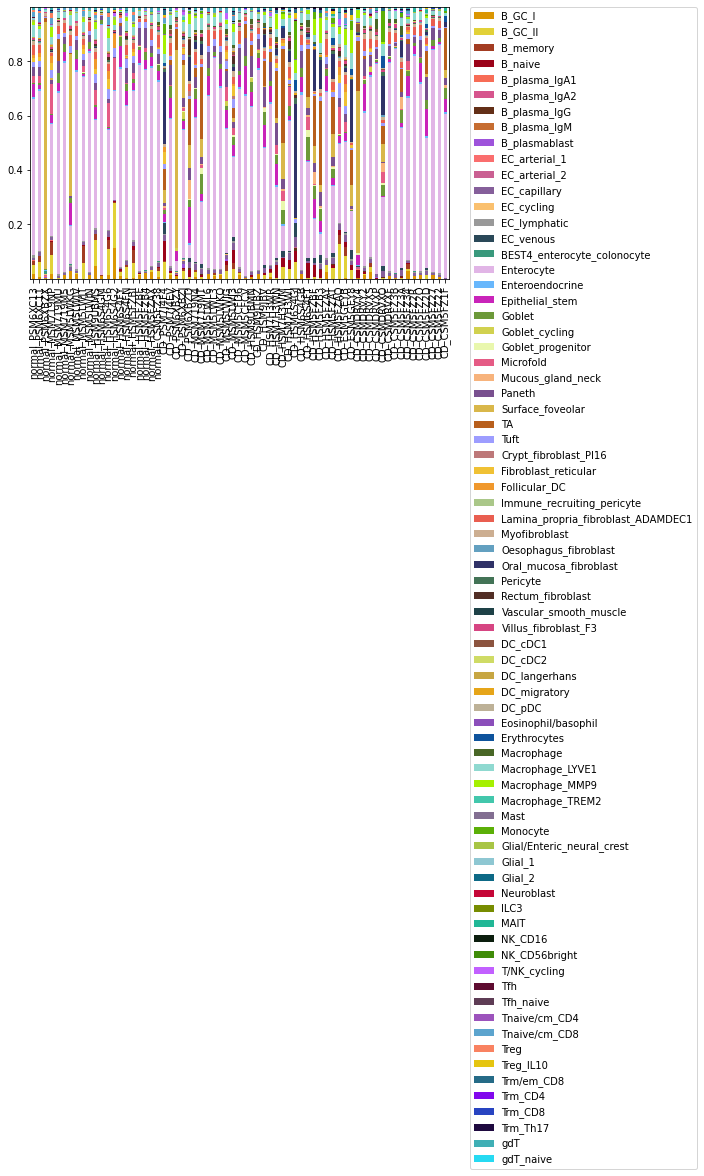

In [178]:
plt.rcParams['figure.figsize'] = [7.5,5]
df.plot.bar(stacked=True,color=level3_palette).legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig('/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/MUC6_proportions/figures/level_3_annot_GSE111889_prop.pdf')

In [179]:
new_df = df
new_df.index = new_df.index.astype(str).str.slice(stop=1)
new_df = new_df.groupby(new_df.index).mean()

In [180]:
new_df

,B_GC_I,B_GC_II,B_memory,B_naive,B_plasma_IgA1,B_plasma_IgA2,B_plasma_IgG,B_plasma_IgM,B_plasmablast,EC_arterial_1,...,Tnaive/cm_CD4,Tnaive/cm_CD8,Treg,Treg_IL10,Trm/em_CD8,Trm_CD4,Trm_CD8,Trm_Th17,gdT,gdT_naive
C,0.006332,0.015953,0.003841,0.013052,0.000023,0.000008,0.001046,0.000014,0.000616,0.000110,...,0.000348,0.004225,0.000936,0.001364,0.003447,0.000019,0.000342,0.001830,0.007881,0.000052
n,0.017810,0.035022,0.012690,0.002623,0.000051,0.000006,0.000025,0.000003,0.000277,0.000585,...,0.000102,0.010231,0.003667,0.000210,0.000873,0.000010,0.000326,0.000611,0.009212,0.000295


In [181]:
new_df = new_df.sort_index(ascending=False)

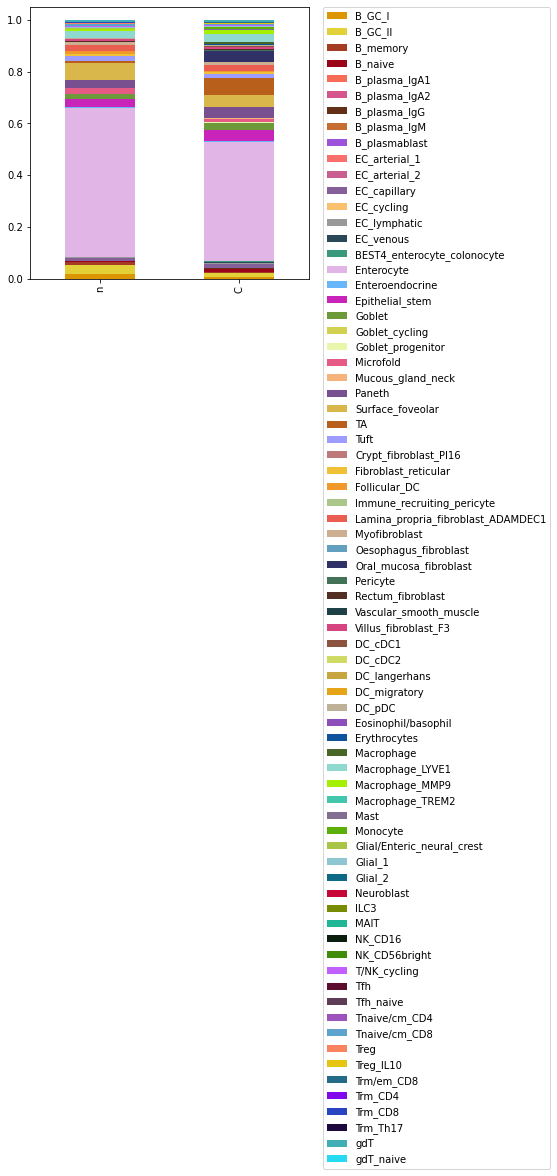

In [182]:
plt.rcParams['figure.figsize'] = [5,5]
new_df.plot.bar(stacked=True,color=level3_palette).legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig('/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/MUC6_proportions/figures/level_3_annot_GSE111889_prop_average.pdf')

In [183]:
columns_list = level3_GSE.columns.tolist()
columns_list

['Trm_Th17',
 'Trm/em_CD8',
 'Tfh_naive',
 'B_plasma_IgA1',
 'TA',
 'Enterocyte',
 'ILC3',
 'Treg_IL10',
 'Goblet_progenitor',
 'Monocyte',
 'B_memory',
 'Enteroendocrine',
 'Trm_CD4',
 'T/NK_cycling',
 'Trm_CD8',
 'B_plasma_IgG',
 'B_naive',
 'Lamina_propria_fibroblast_ADAMDEC1',
 'EC_capillary',
 'NK_CD16',
 'Goblet',
 'Myofibroblast',
 'EC_venous',
 'Tnaive/cm_CD4',
 'Goblet_cycling',
 'Tfh',
 'DC_cDC2',
 'Oral_mucosa_fibroblast',
 'Macrophage',
 'Mucous_gland_neck',
 'gdT',
 'Epithelial_stem',
 'B_plasma_IgM',
 'Tnaive/cm_CD8',
 'MAIT',
 'B_plasmablast',
 'Treg',
 'Crypt_fibroblast_PI16',
 'EC_lymphatic',
 'Paneth',
 'B_GC_II',
 'Pericyte',
 'EC_arterial_1',
 'Tuft',
 'gdT_naive',
 'Villus_fibroblast_F3',
 'Macrophage_TREM2',
 'NK_CD56bright',
 'B_GC_I',
 'BEST4_enterocyte_colonocyte',
 'DC_cDC1',
 'Fibroblast_reticular',
 'DC_migratory',
 'B_plasma_IgA2',
 'DC_pDC',
 'Microfold',
 'Glial/Enteric_neural_crest',
 'Mast',
 'EC_arterial_2',
 'Vascular_smooth_muscle',
 'Macrophage_MMP9

In [184]:
level3_columns={'Trm_Th17':'T and NK cells',
 'Trm/em_CD8':'T and NK cells',
 'Tfh_naive':'T and NK cells',
 'B_plasma_IgA1':'B and B plasma',
 'TA':'Epithelial',
 'Enterocyte':'Epithelial',
 'ILC3':'T and NK cells',
 'Treg_IL10':'T and NK cells',
 'Goblet_progenitor':'Epithelial',
 'Monocyte':'Myeloid',
 'B_memory':'B and B plasma',
 'Enteroendocrine':'Epithelial',
 'Trm_CD4':'T and NK cells',
 'T/NK_cycling':'T and NK cells',
 'Trm_CD8':'T and NK cells',
 'B_plasma_IgG':'B and B plasma',
 'B_naive':'B and B plasma',
 'Lamina_propria_fibroblast_ADAMDEC1':'Mesenchymal',
 'EC_capillary':'Endothelial',
 'NK_CD16':'T and NK cells',
 'Goblet':'Epithelial',
 'Myofibroblast':'Mesenchymal',
 'EC_venous':'Endothelial',
 'Tnaive/cm_CD4':'T and NK cells',
 'Goblet_cycling':'Epithelial',
 'Tfh':'T and NK cells',
 'DC_cDC2':'Myeloid',
 'Oral_mucosa_fibroblast':'Mesenchymal',
 'Macrophage':'Myeloid',
 'Mucous_gland_neck':'Epithelial',
 'gdT':'T and NK cells',
 'Epithelial_stem':'Epithelial',
 'B_plasma_IgM':'B and B plasma',
 'Tnaive/cm_CD8':'T and NK cells',
 'MAIT':'T and NK cells',
 'B_plasmablast':'B and B plasma',
 'Treg':'T and NK cells',
 'Crypt_fibroblast_PI16':'Mesenchymal',
 'EC_lymphatic':'Endothelial',
 'Paneth':'Epithelial',
 'B_GC_II':'B and B plasma',
 'Pericyte':'Mesenchymal',
 'EC_arterial_1':'Endothelial',
 'Tuft':'Epithelial',
 'gdT_naive':'T and NK cells',
 'Villus_fibroblast_F3':'Mesenchymal',
 'Macrophage_TREM2':'Myeloid',
 'NK_CD56bright':'T and NK cells',
 'B_GC_I':'B and B plasma',
 'BEST4_enterocyte_colonocyte':'Epithelial',
 'DC_cDC1':'Myeloid',
 'Fibroblast_reticular':'Mesenchymal',
 'DC_migratory':'Myeloid',
 'B_plasma_IgA2':'B and B plasma',
 'DC_pDC':'Myeloid',
 'Microfold':'Epithelial',
 'Glial/Enteric_neural_crest':'Neural',
 'Mast':'Myeloid',
 'EC_arterial_2':'Endothelial',
 'Vascular_smooth_muscle':'Mesenchymal',
 'Macrophage_MMP9':'Myeloid',
 'Follicular_DC':'Myeloid',
 'Eosinophil/basophil':'Myeloid',
 'Surface_foveolar':'Epithelial',
 'Glial_2':'Neural',
 'Neuroblast':'Neural',
 'Macrophage_LYVE1':'Myeloid',
 'DC_langerhans':'Myeloid',
 'Glial_1':'Neural',
 'Oesophagus_fibroblast':'Mesenchymal',
 'Immune_recruiting_pericyte':'Mesenchymal',
 'Rectum_fibroblast':'Mesenchymal',
 'EC_cycling':'Endothelial',
 'Erythrocytes':'Myeloid'}


In [185]:
df = level3_GSE.rename(columns=level3_columns)

In [186]:
df

,T and NK cells,T and NK cells,T and NK cells,B and B plasma,Epithelial,Epithelial,T and NK cells,T and NK cells,Epithelial,Myeloid,...,Neural,Neural,Myeloid,Myeloid,Neural,Mesenchymal,Mesenchymal,Mesenchymal,Endothelial,Myeloid
CD_CSM5FZ1F,0.000003,0.000003,4.976976e-07,9.917840e-07,1.559674e-01,0.605168,0.000001,1.573325e-06,0.000019,9.496578e-03,...,1.373276e-05,9.493208e-07,0.009546,0.000002,0.000010,6.120680e-05,0.000002,3.262709e-07,0.000002,2.063501e-02
CD_CSM5FZ22,0.000003,0.000002,1.327704e-06,6.365930e-07,8.990535e-07,0.839300,0.000001,1.134526e-06,0.000001,5.306814e-07,...,7.086790e-07,6.510039e-04,0.018310,0.000001,0.000003,8.066145e-07,0.000002,1.123811e-06,0.000001,3.711337e-07
CD_CSM5FZ27,0.000003,0.000001,2.316841e-06,1.378226e-06,2.508334e-06,0.816772,0.000002,7.252029e-07,0.000014,4.014375e-07,...,7.112819e-07,4.085633e-06,0.017383,0.000003,0.000005,1.863756e-06,0.000006,2.747853e-05,0.000010,2.593737e-07
CD_CSM5FZ2D,0.001423,0.000004,4.511783e-06,2.652438e-06,8.540133e-02,0.476136,0.000004,9.533337e-04,0.000003,4.065779e-03,...,8.273879e-05,4.364156e-04,0.022882,0.000002,0.004185,1.785087e-03,0.000045,3.694889e-06,0.000003,1.707169e-02
CD_CSM5FZ2O,0.000027,0.000002,4.540090e-06,2.579929e-06,5.813454e-06,0.687890,0.000021,1.755728e-06,0.000002,7.202227e-07,...,2.143117e-06,1.332708e-03,0.026052,0.000003,0.000151,2.805757e-06,0.000002,1.901798e-05,0.000002,3.885268e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CD_PSM6XBZY,0.000002,0.000008,4.271816e-06,4.340337e-06,7.579806e-02,0.035537,0.000284,1.421071e-06,0.000700,2.201604e-06,...,5.230641e-06,2.776028e-04,0.015214,0.000002,0.002190,7.348040e-04,0.000015,2.352684e-03,0.003340,5.907667e-04
normal_PSM6XC11,0.000016,0.000003,9.344249e-05,1.190519e-06,1.906662e-06,0.587188,0.000270,1.866902e-06,0.000002,9.193865e-07,...,1.258166e-06,2.636917e-03,0.034185,0.001682,0.000861,1.187679e-03,0.000013,3.018145e-06,0.000038,6.908363e-07
normal_PSM6XC13,0.000027,0.000018,1.062700e-05,1.243041e-06,1.882713e-06,0.575626,0.000014,9.105031e-06,0.000114,1.285911e-06,...,1.292786e-06,2.454169e-03,0.044759,0.001508,0.004605,4.517704e-06,0.000006,5.218729e-06,0.000001,6.342979e-07
CD_PSM7J4EV,0.000454,0.002994,4.956185e-06,2.167901e-06,2.090121e-02,0.542163,0.000002,9.492292e-06,0.002193,6.002320e-07,...,3.086505e-06,1.646259e-05,0.035420,0.000031,0.003199,1.486653e-05,0.000026,3.020445e-03,0.000003,3.343827e-07


In [187]:
column_order = ['B and B plasma', 'Endothelial', 'Epithelial',
               'Mesenchymal','Myeloid','Neural','T and NK cells']
df = df[column_order]
df = df.sort_index(ascending=False)

In [188]:
df = df[column_order]
df = df.sort_index(ascending=False)

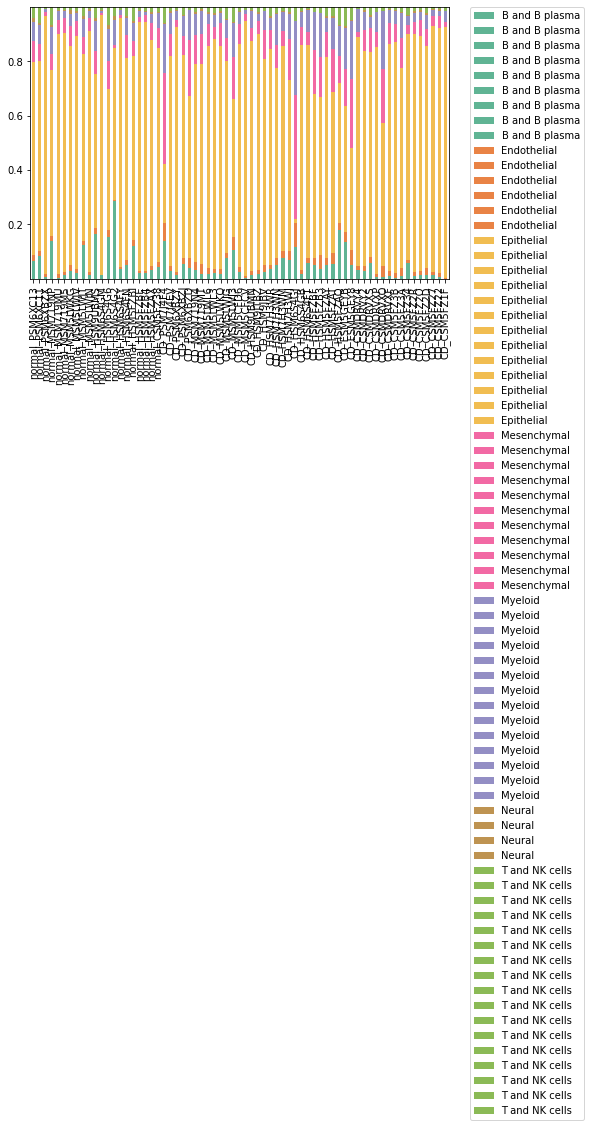

In [189]:
plt.rcParams['figure.figsize'] = [7.5,5]
df.plot.bar(stacked=True,color=level1_palette).legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig('/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/MUC6_proportions/figures/level_1_annot_GSE111889_prop.pdf')

In [190]:
df

,B and B plasma,B and B plasma,B and B plasma,B and B plasma,B and B plasma,B and B plasma,B and B plasma,B and B plasma,B and B plasma,Endothelial,...,T and NK cells,T and NK cells,T and NK cells,T and NK cells,T and NK cells,T and NK cells,T and NK cells,T and NK cells,T and NK cells,T and NK cells
normal_PSM6XC13,1.243041e-06,1.436572e-02,1.008142e-06,3.914876e-06,1.136356e-06,5.538040e-07,3.570662e-02,1.601272e-02,1.019335e-06,0.007600,...,0.000009,0.000001,3.827341e-06,1.237660e-03,0.010329,1.759501e-02,0.000337,0.010058,0.000039,2.577916e-04
normal_PSM6XC11,1.190519e-06,2.091645e-02,1.087352e-06,1.107872e-03,2.210290e-06,2.222492e-06,5.541329e-02,6.654989e-03,8.703641e-07,0.012192,...,0.000159,0.000005,7.619651e-04,4.621581e-04,0.011595,3.601174e-02,0.000027,0.007838,0.001639,5.118684e-04
normal_PSM6XBZX,1.136551e-06,7.346453e-07,1.400474e-06,7.212313e-07,5.697055e-07,2.276353e-03,8.766074e-07,3.400214e-03,8.577418e-07,0.000002,...,0.000003,0.000002,3.309231e-05,9.481468e-07,0.000003,1.066649e-03,0.000003,0.000001,0.000057,3.547945e-04
normal_MSM719NP,3.475512e-06,4.489777e-02,1.940007e-04,6.249598e-03,3.268309e-06,6.221936e-06,7.036082e-02,1.795986e-02,4.366859e-06,0.010706,...,0.000036,0.000008,2.050026e-05,1.722996e-04,0.011945,2.319438e-02,0.000056,0.018841,0.000510,7.715911e-06
normal_MSM719MU,1.096447e-05,4.297089e-04,8.209688e-06,2.076587e-05,7.358428e-06,2.104868e-06,3.518283e-03,5.107041e-06,3.272285e-06,0.007281,...,0.003319,0.000120,2.704697e-06,2.104383e-06,0.007887,4.034593e-04,0.000031,0.000009,0.000066,2.419974e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CD_CSM5FZ2O,2.579929e-06,1.644949e-06,1.064379e-06,7.113304e-07,3.476874e-06,1.727543e-06,2.063493e-06,1.499523e-02,1.807564e-06,0.007347,...,0.000532,0.000002,1.796020e-05,1.265390e-06,0.008146,4.128002e-03,0.000007,0.000005,0.000025,2.527576e-06
CD_CSM5FZ2D,2.652438e-06,7.128151e-05,1.034559e-05,2.032147e-04,6.365982e-06,1.516818e-06,1.239740e-02,5.347420e-06,2.886597e-06,0.016295,...,0.000007,0.000002,2.653235e-05,6.749238e-06,0.004062,3.721804e-03,0.010903,0.002159,0.000043,3.099599e-06
CD_CSM5FZ27,1.378226e-06,9.291720e-07,7.507800e-07,7.513799e-07,1.377296e-06,3.132440e-06,1.358401e-06,1.413870e-02,7.779781e-07,0.005045,...,0.000733,0.000023,3.783354e-06,2.514287e-06,0.005905,1.756184e-03,0.000003,0.000002,0.000062,1.824956e-06
CD_CSM5FZ22,6.365930e-07,8.600557e-07,3.730402e-07,1.060137e-06,7.555704e-07,6.678124e-07,1.436477e-06,6.342393e-03,5.051526e-07,0.008279,...,0.000638,0.000002,2.593848e-06,2.524190e-06,0.005434,2.901436e-03,0.000003,0.000003,0.000006,8.532985e-07


In [191]:
new_df = df

In [192]:
new_df.index = new_df.index.astype(str).str.slice(stop=1)

In [193]:
new_df

,B and B plasma,B and B plasma,B and B plasma,B and B plasma,B and B plasma,B and B plasma,B and B plasma,B and B plasma,B and B plasma,Endothelial,...,T and NK cells,T and NK cells,T and NK cells,T and NK cells,T and NK cells,T and NK cells,T and NK cells,T and NK cells,T and NK cells,T and NK cells
n,1.243041e-06,1.436572e-02,1.008142e-06,3.914876e-06,1.136356e-06,5.538040e-07,3.570662e-02,1.601272e-02,1.019335e-06,0.007600,...,0.000009,0.000001,3.827341e-06,1.237660e-03,0.010329,1.759501e-02,0.000337,0.010058,0.000039,2.577916e-04
n,1.190519e-06,2.091645e-02,1.087352e-06,1.107872e-03,2.210290e-06,2.222492e-06,5.541329e-02,6.654989e-03,8.703641e-07,0.012192,...,0.000159,0.000005,7.619651e-04,4.621581e-04,0.011595,3.601174e-02,0.000027,0.007838,0.001639,5.118684e-04
n,1.136551e-06,7.346453e-07,1.400474e-06,7.212313e-07,5.697055e-07,2.276353e-03,8.766074e-07,3.400214e-03,8.577418e-07,0.000002,...,0.000003,0.000002,3.309231e-05,9.481468e-07,0.000003,1.066649e-03,0.000003,0.000001,0.000057,3.547945e-04
n,3.475512e-06,4.489777e-02,1.940007e-04,6.249598e-03,3.268309e-06,6.221936e-06,7.036082e-02,1.795986e-02,4.366859e-06,0.010706,...,0.000036,0.000008,2.050026e-05,1.722996e-04,0.011945,2.319438e-02,0.000056,0.018841,0.000510,7.715911e-06
n,1.096447e-05,4.297089e-04,8.209688e-06,2.076587e-05,7.358428e-06,2.104868e-06,3.518283e-03,5.107041e-06,3.272285e-06,0.007281,...,0.003319,0.000120,2.704697e-06,2.104383e-06,0.007887,4.034593e-04,0.000031,0.000009,0.000066,2.419974e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C,2.579929e-06,1.644949e-06,1.064379e-06,7.113304e-07,3.476874e-06,1.727543e-06,2.063493e-06,1.499523e-02,1.807564e-06,0.007347,...,0.000532,0.000002,1.796020e-05,1.265390e-06,0.008146,4.128002e-03,0.000007,0.000005,0.000025,2.527576e-06
C,2.652438e-06,7.128151e-05,1.034559e-05,2.032147e-04,6.365982e-06,1.516818e-06,1.239740e-02,5.347420e-06,2.886597e-06,0.016295,...,0.000007,0.000002,2.653235e-05,6.749238e-06,0.004062,3.721804e-03,0.010903,0.002159,0.000043,3.099599e-06
C,1.378226e-06,9.291720e-07,7.507800e-07,7.513799e-07,1.377296e-06,3.132440e-06,1.358401e-06,1.413870e-02,7.779781e-07,0.005045,...,0.000733,0.000023,3.783354e-06,2.514287e-06,0.005905,1.756184e-03,0.000003,0.000002,0.000062,1.824956e-06
C,6.365930e-07,8.600557e-07,3.730402e-07,1.060137e-06,7.555704e-07,6.678124e-07,1.436477e-06,6.342393e-03,5.051526e-07,0.008279,...,0.000638,0.000002,2.593848e-06,2.524190e-06,0.005434,2.901436e-03,0.000003,0.000003,0.000006,8.532985e-07


In [194]:
new_df = new_df.groupby(new_df.index).mean()

In [195]:
new_df

,B and B plasma,B and B plasma,B and B plasma,B and B plasma,B and B plasma,B and B plasma,B and B plasma,B and B plasma,B and B plasma,Endothelial,...,T and NK cells,T and NK cells,T and NK cells,T and NK cells,T and NK cells,T and NK cells,T and NK cells,T and NK cells,T and NK cells,T and NK cells
C,0.000023,0.003841,0.001046,0.013052,0.000014,0.000616,0.015953,0.006332,0.000008,0.013831,...,0.000342,0.000033,0.000348,0.000182,0.007881,0.004225,0.000937,0.000936,0.000052,0.000077
n,0.000051,0.012690,0.000025,0.002623,0.000003,0.000277,0.035022,0.017810,0.000006,0.008791,...,0.000326,0.000024,0.000102,0.000249,0.009212,0.010231,0.000112,0.003667,0.000295,0.000080


In [196]:
new_df = new_df.sort_index(ascending=False)

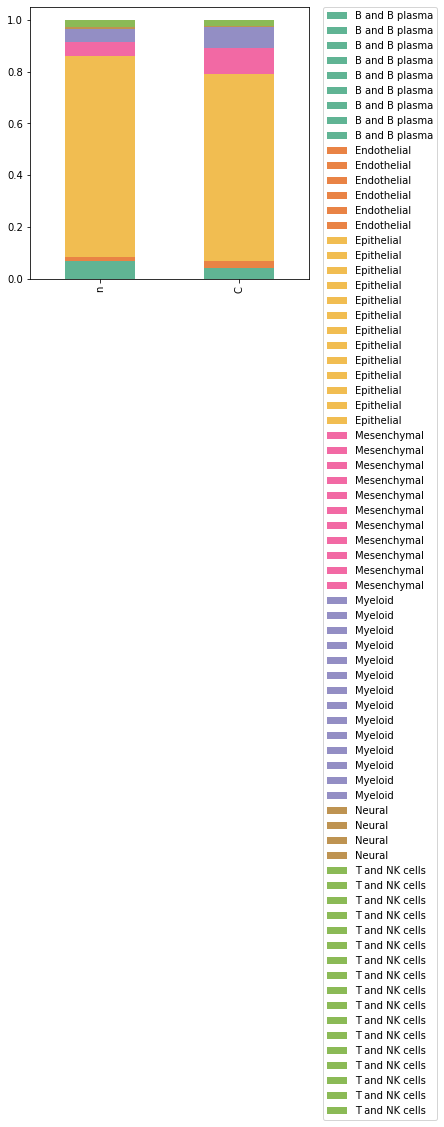

In [197]:
plt.rcParams['figure.figsize'] = [5,5]
new_df.plot.bar(stacked=True,color=level1_palette).legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig('/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/MUC6_proportions/figures/level_1_annot_GSE111889_prop_average.pdf')

In [198]:
column_order = [#B and B plasma
   'B_GC_I','B_GC_II','B_memory','B_naive','B_plasma_IgA1','B_plasma_IgA2',
    'B_plasma_IgG','B_plasma_IgM','B_plasmablast',
    
    #endothelial
    'EC_arterial_1',
'EC_arterial_2',
'EC_capillary',
'EC_cycling',
'EC_lymphatic',
'EC_venous',
    
    #epithelial
   'BEST4_enterocyte_colonocyte','Enterocyte','Enteroendocrine',
    'Epithelial_stem','Goblet','Goblet_cycling','Goblet_progenitor',
    'Microfold','Mucous_gland_neck','Paneth','Surface_foveolar','TA','Tuft',
    
    #mesenchymal
    'Crypt_fibroblast_PI16',
'Fibroblast_reticular',
'Follicular_DC',
'Immune_recruiting_pericyte',
'Lamina_propria_fibroblast_ADAMDEC1',
'Myofibroblast',
'Oesophagus_fibroblast',
'Oral_mucosa_fibroblast',
'Pericyte',
'Rectum_fibroblast',
'Vascular_smooth_muscle',
'Villus_fibroblast_F3',
    
    #myeloid
 'DC_cDC1',
'DC_cDC2',
'DC_langerhans',
'DC_migratory',
'DC_pDC',
'Eosinophil/basophil',
'Erythrocytes',
'Macrophage',
'Macrophage_LYVE1',
'Macrophage_MMP9',
'Macrophage_TREM2',
'Mast',
'Monocyte',

    
    #neural
    'Glial/Enteric_neural_crest',
    'Glial_1','Glial_2','Neuroblast',

    
    
    #T and NK cells
     'ILC3','MAIT','NK_CD16','NK_CD56bright','T/NK_cycling','Tfh','Tfh_naive',
    'Tnaive/cm_CD4','Tnaive/cm_CD8','Treg','Treg_IL10','Trm/em_CD8',
    'Trm_CD4','Trm_CD8','Trm_Th17','gdT','gdT_naive'

]

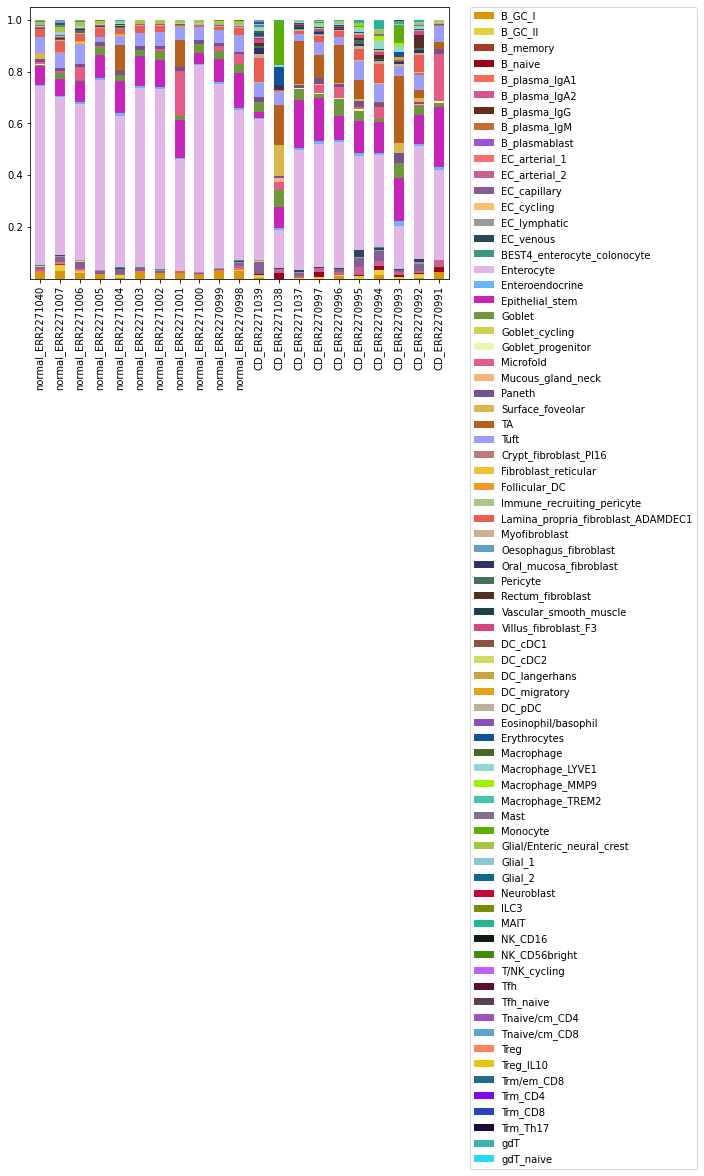

In [199]:
df = level3_E_MTAB.reindex(sorted(level3_E_MTAB.columns), axis=1)
df = df.sort_index(ascending=False)
df = df[column_order]
df = df.sort_index(ascending=False)
plt.rcParams['figure.figsize'] = [7.5,5]
df.plot.bar(stacked=True,color=level3_palette).legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig('/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/MUC6_proportions/figures/level_3_annot_E_MTAB_5464_prop.pdf')

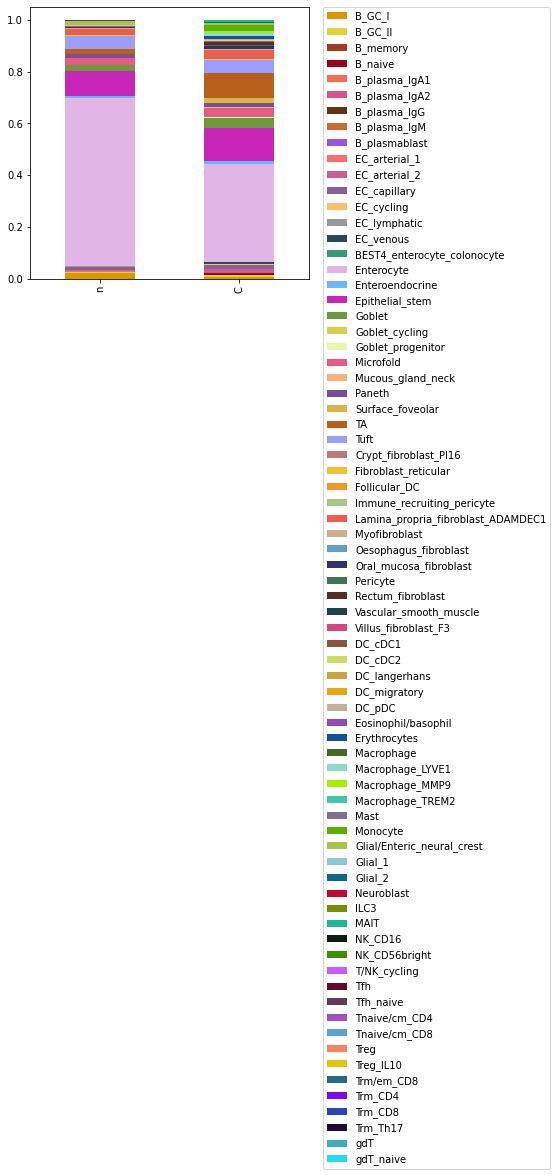

In [200]:
new_df = df
new_df.index = new_df.index.astype(str).str.slice(stop=1)
new_df = new_df.groupby(new_df.index).mean()
new_df = new_df.sort_index(ascending=False)
plt.rcParams['figure.figsize'] = [5,5]
new_df.plot.bar(stacked=True,color=level3_palette).legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig('/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/MUC6_proportions/figures/level_3_annot_E_MTAB_5464_prop_average.pdf')

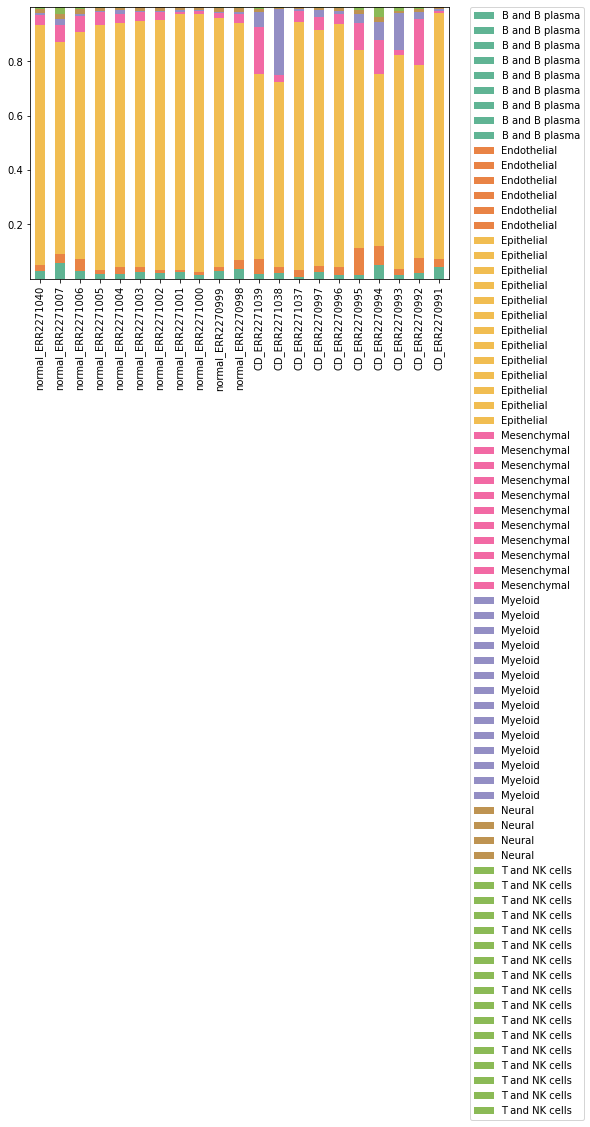

In [201]:
df = level3_E_MTAB.rename(columns=level3_columns)
column_order = ['B and B plasma', 'Endothelial', 'Epithelial',
               'Mesenchymal','Myeloid','Neural','T and NK cells']
df = df[column_order]
df = df.sort_index(ascending=False)
plt.rcParams['figure.figsize'] = [7.5,5]
df.plot.bar(stacked=True,color=level1_palette).legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig('/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/MUC6_proportions/figures/level_1_annot_E_MTAB_5464_prop.pdf')

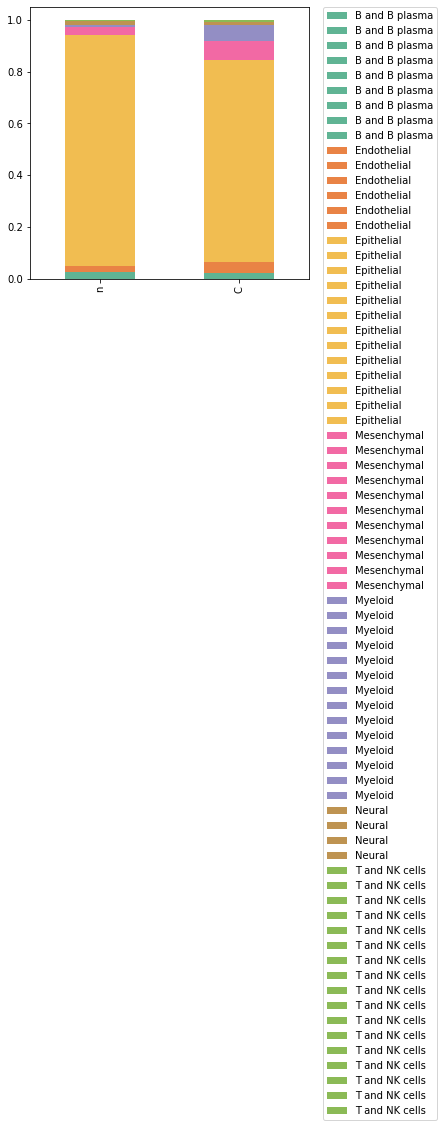

In [202]:
new_df = df
new_df.index = new_df.index.astype(str).str.slice(stop=1)
new_df = new_df.groupby(new_df.index).mean()
new_df = new_df.sort_index(ascending=False)
plt.rcParams['figure.figsize'] = [5,5]
new_df.plot.bar(stacked=True,color=level1_palette).legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig('/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/MUC6_proportions/figures/level_1_annot_E_MTAB_5464_prop_average.pdf')

In [203]:
column_order = [#B and B plasma
   'B_GC_I','B_GC_II','B_memory','B_naive','B_plasma_IgA1','B_plasma_IgA2',
    'B_plasma_IgG','B_plasma_IgM','B_plasmablast',
    
    #endothelial
    'EC_arterial_1',
'EC_arterial_2',
'EC_capillary',
'EC_cycling',
'EC_lymphatic',
'EC_venous',
    
    #epithelial
   'BEST4_enterocyte_colonocyte','Enterocyte','Enteroendocrine',
    'Epithelial_stem','Goblet','Goblet_cycling','Goblet_progenitor',
    'Microfold','Mucous_gland_neck','Paneth','Surface_foveolar','TA','Tuft',
    
    #mesenchymal
    'Crypt_fibroblast_PI16',
'Fibroblast_reticular',
'Follicular_DC',
'Immune_recruiting_pericyte',
'Lamina_propria_fibroblast_ADAMDEC1',
'Myofibroblast',
'Oesophagus_fibroblast',
'Oral_mucosa_fibroblast',
'Pericyte',
'Rectum_fibroblast',
'Vascular_smooth_muscle',
'Villus_fibroblast_F3',
    
    #myeloid
 'DC_cDC1',
'DC_cDC2',
'DC_langerhans',
'DC_migratory',
'DC_pDC',
'Eosinophil/basophil',
'Erythrocytes',
'Macrophage',
'Macrophage_LYVE1',
'Macrophage_MMP9',
'Macrophage_TREM2',
'Mast',
'Monocyte',

    
    #neural
    'Glial/Enteric_neural_crest',
    'Glial_1','Glial_2','Neuroblast',

    
    
    #T and NK cells
     'ILC3','MAIT','NK_CD16','NK_CD56bright','T/NK_cycling','Tfh','Tfh_naive',
    'Tnaive/cm_CD4','Tnaive/cm_CD8','Treg','Treg_IL10','Trm/em_CD8',
    'Trm_CD4','Trm_CD8','Trm_Th17','gdT','gdT_naive'

]

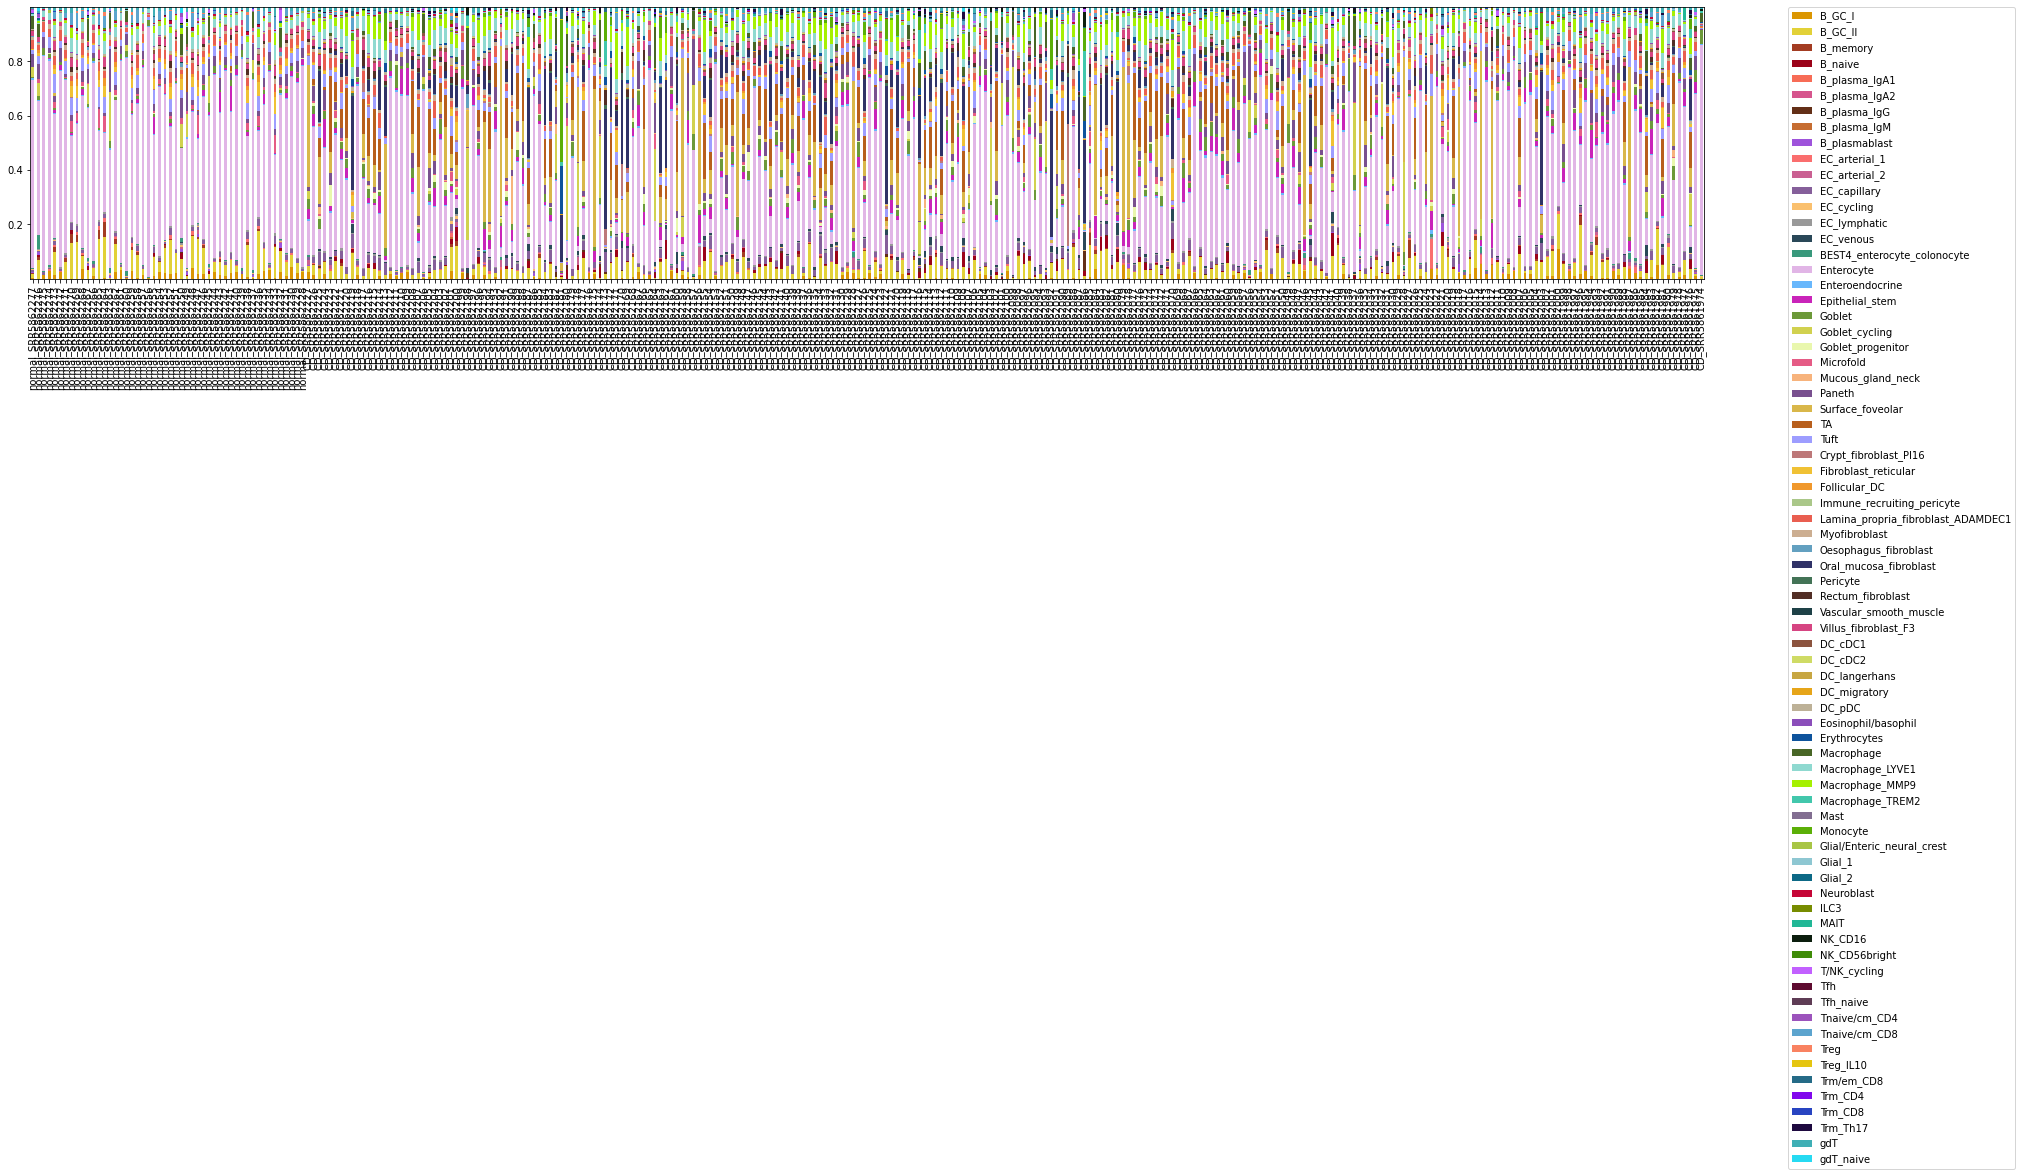

In [204]:
plt.rcParams['figure.figsize'] = [30,5]
df = level3_E_GEOD.reindex(sorted(level3_E_GEOD.columns), axis=1)
df = df.sort_index(ascending=False)
df = df[column_order]
df = df.sort_index(ascending=False)
plt.rcParams['figure.figsize'] = [30,5]
df.plot.bar(stacked=True,color=level3_palette).legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig('/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/MUC6_proportions/figures/level_3_annot_E_GEOD_101794_prop.pdf')

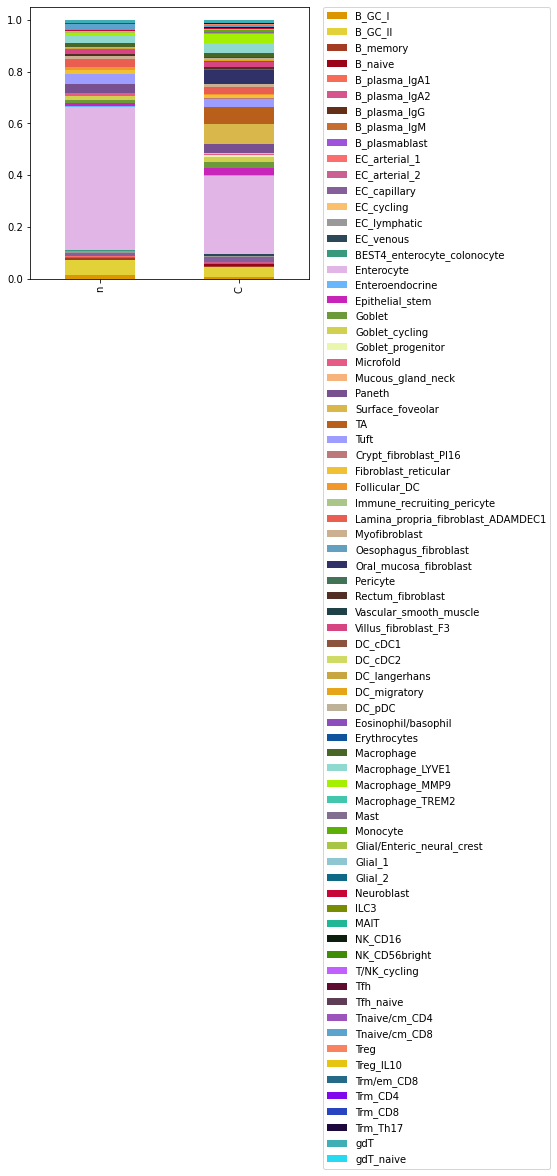

In [205]:
new_df = df
new_df.index = new_df.index.astype(str).str.slice(stop=1)
new_df = new_df.groupby(new_df.index).mean()
new_df = new_df.sort_index(ascending=False)
plt.rcParams['figure.figsize'] = [5,5]
new_df.plot.bar(stacked=True,color=level3_palette).legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig('/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/MUC6_proportions/figures/level_3_annot_E_GEOD_101794_prop_average.pdf')

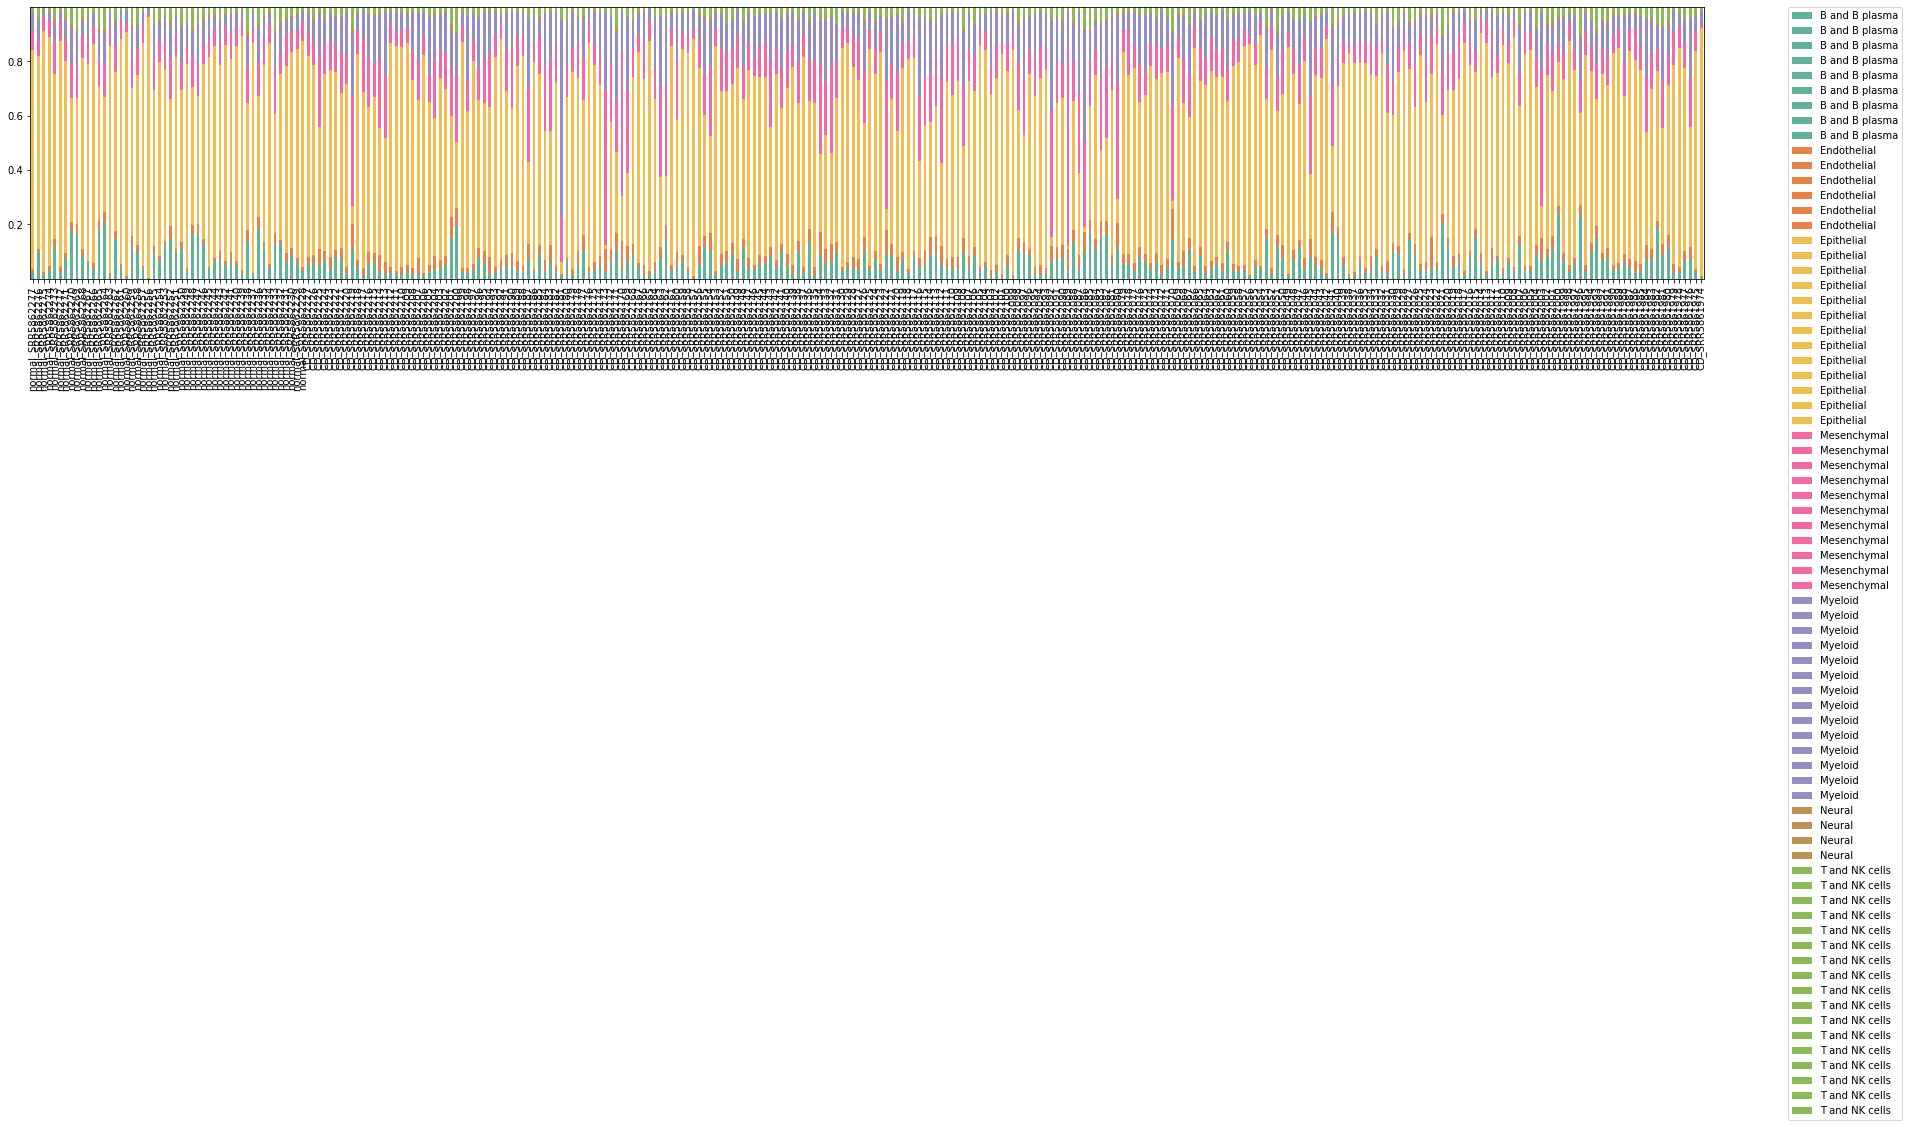

In [206]:
df = level3_E_GEOD.rename(columns=level3_columns)
column_order = ['B and B plasma', 'Endothelial', 'Epithelial',
               'Mesenchymal','Myeloid','Neural','T and NK cells']
df = df[column_order]
df = df.sort_index(ascending=False)
plt.rcParams['figure.figsize'] = [30,5]
df.plot.bar(stacked=True,color=level1_palette).legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig('/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/MUC6_proportions/figures/level_1_annot_E_GEOD_101794_prop.pdf')

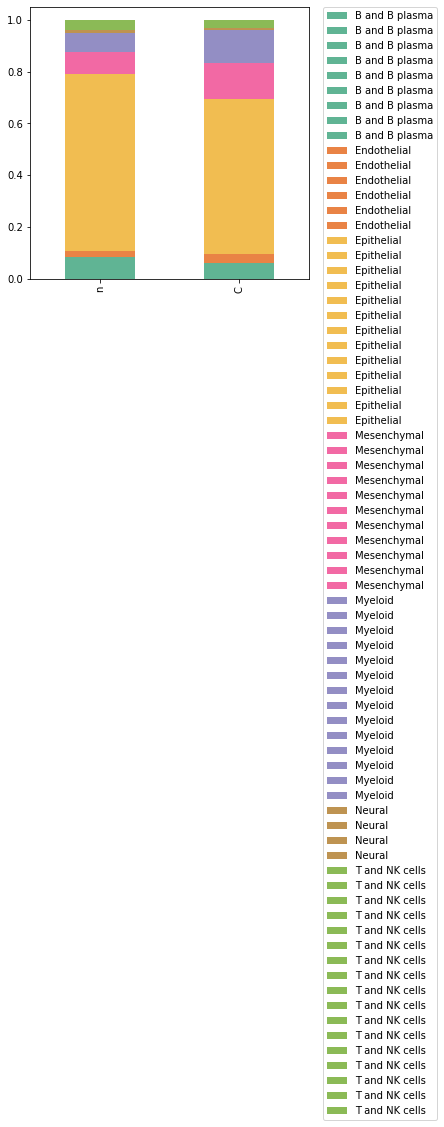

In [207]:
new_df = df
new_df.index = new_df.index.astype(str).str.slice(stop=1)
new_df = new_df.groupby(new_df.index).mean()
new_df = new_df.sort_index(ascending=False)
plt.rcParams['figure.figsize'] = [5,5]
new_df.plot.bar(stacked=True,color=level1_palette).legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig('/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/MUC6_proportions/figures/level_1_annot_E_GEOD_101794_prop_average.pdf')

In [217]:
#GSE126299 - LCM of pyloric gland metaplasia

In [281]:
GSE126299 = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/MUC6_proportions/deconv_proportion_level3_GSE126299_new_sc_ref.csv',index_col=0) 

In [282]:
GSE126299['sample_donor'] = GSE126299.sample_info.astype(str)+'_'+GSE126299.sample_id.astype(str)

In [283]:
GSE126299

,sample_info,Trm_Th17,Trm/em_CD8,Tfh_naive,B_plasma_IgA1,TA,Enterocyte,ILC3,Treg_IL10,Goblet_progenitor,...,Immune_recruiting_pericyte,Rectum_fibroblast,EC_cycling,Erythrocytes,sample_type,location,sample_info.1,samp_loc,sample_id,sample_donor
6B,CD_non-UACL_Intestinal epithelium monlayer,0.000002,0.000002,0.000002,0.000002,0.000021,0.079633,0.000002,0.000002,0.000002,...,0.000002,0.000003,0.000003,0.024116,inflamed,neoterminal ileum,CD_non-UACL_Intestinal epithelium monlayer,inflamed_neoterminal ileum,6B,CD_non-UACL_Intestinal epithelium monlayer_6B
5B,CD_non-UACL_Intestinal epithelium monlayer,0.000011,0.000011,0.000011,0.000011,0.045237,0.000054,0.000007,0.000012,0.000015,...,0.000033,0.005446,0.000008,0.006615,inflamed,terminal ileum,CD_non-UACL_Intestinal epithelium monlayer,inflamed_terminal ileum,5B,CD_non-UACL_Intestinal epithelium monlayer_5B
1B,CD_non-UACL_Intestinal epithelium monlayer,0.000016,0.000023,0.000017,0.001480,0.067250,0.343159,0.000012,0.000014,0.000002,...,0.000004,0.000194,0.000012,0.000015,inflamed,terminal ileum,CD_non-UACL_Intestinal epithelium monlayer,inflamed_terminal ileum,1B,CD_non-UACL_Intestinal epithelium monlayer_1B
5A,CD_UACL_Intestinal epithelium monlayer,0.000005,0.000007,0.000005,0.000005,0.000030,0.000006,0.000005,0.000005,0.000008,...,0.000005,0.000004,0.019445,0.000215,inflamed,terminal ileum,CD_UACL_Intestinal epithelium monlayer,inflamed_terminal ileum,5A,CD_UACL_Intestinal epithelium monlayer_5A
6A,CD_UACL_Intestinal epithelium monlayer,0.000004,0.000003,0.000003,0.000004,0.000018,0.000006,0.000003,0.000003,0.000004,...,0.000003,0.000003,0.000012,0.000003,inflamed,neoterminal ileum,CD_UACL_Intestinal epithelium monlayer,inflamed_neoterminal ileum,6A,CD_UACL_Intestinal epithelium monlayer_6A
22B,CD_non-UACL_Intestinal epithelium monlayer,0.000004,0.000004,0.000004,0.000003,0.066330,0.154082,0.000003,0.000004,0.000252,...,0.000006,0.000006,0.000009,0.000004,noninflamed,terminal ileum,CD_non-UACL_Intestinal epithelium monlayer,noninflamed_terminal ileum,22B,CD_non-UACL_Intestinal epithelium monlayer_22B
3B,CD_non-UACL_Intestinal epithelium monlayer,0.000014,0.000015,0.000012,0.000026,0.215318,0.317260,0.000014,0.000014,0.000007,...,0.000006,0.000008,0.000013,0.000006,inflamed,neoterminal ileum,CD_non-UACL_Intestinal epithelium monlayer,inflamed_neoterminal ileum,3B,CD_non-UACL_Intestinal epithelium monlayer_3B
1A,CD_UACL_Intestinal epithelium monlayer,0.000003,0.000002,0.000003,0.000002,0.322438,0.000006,0.000002,0.000003,0.000004,...,0.010526,0.000006,0.000003,0.000003,inflamed,terminal ileum,CD_UACL_Intestinal epithelium monlayer,inflamed_terminal ileum,1A,CD_UACL_Intestinal epithelium monlayer_1A
2A,CD_UACL_Intestinal epithelium monlayer,0.000005,0.000004,0.000003,0.000004,0.012679,0.076128,0.000004,0.000005,0.000002,...,0.000003,0.000005,0.000003,0.000007,inflamed,neoterminal ileum,CD_UACL_Intestinal epithelium monlayer,inflamed_neoterminal ileum,2A,CD_UACL_Intestinal epithelium monlayer_2A
18B,CD_non-UACL_Intestinal epithelium monlayer,0.000005,0.000006,0.000005,0.000009,0.000025,0.779029,0.000005,0.000006,0.000032,...,0.000008,0.000004,0.000006,0.000003,noninflamed,terminal ileum,CD_non-UACL_Intestinal epithelium monlayer,noninflamed_terminal ileum,18B,CD_non-UACL_Intestinal epithelium monlayer_18B


In [284]:
column_order = [#B and B plasma
   'B_GC_I','B_GC_II','B_memory','B_naive','B_plasma_IgA1','B_plasma_IgA2',
    'B_plasma_IgG','B_plasma_IgM','B_plasmablast',
    
    #endothelial
    'EC_arterial_1',
'EC_arterial_2',
'EC_capillary',
'EC_cycling',
'EC_lymphatic',
'EC_venous',
    
    #epithelial
   'BEST4_enterocyte_colonocyte','Enterocyte','Enteroendocrine',
    'Epithelial_stem','Goblet','Goblet_cycling','Goblet_progenitor',
    'Microfold','Mucous_gland_neck','Paneth','Surface_foveolar','TA','Tuft',
    
    #mesenchymal
    'Crypt_fibroblast_PI16',
'Fibroblast_reticular',
'Follicular_DC',
'Immune_recruiting_pericyte',
'Lamina_propria_fibroblast_ADAMDEC1',
'Myofibroblast',
'Oesophagus_fibroblast',
'Oral_mucosa_fibroblast',
'Pericyte',
'Rectum_fibroblast',
'Vascular_smooth_muscle',
'Villus_fibroblast_F3',
    
    #myeloid
 'DC_cDC1',
'DC_cDC2',
'DC_langerhans',
'DC_migratory',
'DC_pDC',
'Eosinophil/basophil',
'Erythrocytes',
'Macrophage',
'Macrophage_LYVE1',
'Macrophage_MMP9',
'Macrophage_TREM2',
'Mast',
'Monocyte',

    
    #neural
    'Glial/Enteric_neural_crest',
    'Glial_1','Glial_2','Neuroblast',

    
    
    #T and NK cells
     'ILC3','MAIT','NK_CD16','NK_CD56bright','T/NK_cycling','Tfh','Tfh_naive',
    'Tnaive/cm_CD4','Tnaive/cm_CD8','Treg','Treg_IL10','Trm/em_CD8',
    'Trm_CD4','Trm_CD8','Trm_Th17','gdT','gdT_naive'

]

In [285]:
GSE126299 = GSE126299.sort_values(['sample_donor'])

In [286]:
GSE126299

,sample_info,Trm_Th17,Trm/em_CD8,Tfh_naive,B_plasma_IgA1,TA,Enterocyte,ILC3,Treg_IL10,Goblet_progenitor,...,Immune_recruiting_pericyte,Rectum_fibroblast,EC_cycling,Erythrocytes,sample_type,location,sample_info.1,samp_loc,sample_id,sample_donor
1A,CD_UACL_Intestinal epithelium monlayer,0.000003,0.000002,0.000003,0.000002,0.322438,0.000006,0.000002,0.000003,0.000004,...,0.010526,0.000006,0.000003,0.000003,inflamed,terminal ileum,CD_UACL_Intestinal epithelium monlayer,inflamed_terminal ileum,1A,CD_UACL_Intestinal epithelium monlayer_1A
2A,CD_UACL_Intestinal epithelium monlayer,0.000005,0.000004,0.000003,0.000004,0.012679,0.076128,0.000004,0.000005,0.000002,...,0.000003,0.000005,0.000003,0.000007,inflamed,neoterminal ileum,CD_UACL_Intestinal epithelium monlayer,inflamed_neoterminal ileum,2A,CD_UACL_Intestinal epithelium monlayer_2A
3A,CD_UACL_Intestinal epithelium monlayer,0.000003,0.000004,0.000004,0.000004,0.000012,0.000008,0.000004,0.000004,0.000004,...,0.000011,0.000005,0.162967,0.000004,inflamed,neoterminal ileum,CD_UACL_Intestinal epithelium monlayer,inflamed_neoterminal ileum,3A,CD_UACL_Intestinal epithelium monlayer_3A
4A,CD_UACL_Intestinal epithelium monlayer,0.000004,0.000004,0.000003,0.000004,0.000004,0.000004,0.000004,0.000004,0.349799,...,0.000004,0.000029,0.000004,0.000004,inflamed,neoterminal ileum,CD_UACL_Intestinal epithelium monlayer,inflamed_neoterminal ileum,4A,CD_UACL_Intestinal epithelium monlayer_4A
5A,CD_UACL_Intestinal epithelium monlayer,0.000005,0.000007,0.000005,0.000005,0.000030,0.000006,0.000005,0.000005,0.000008,...,0.000005,0.000004,0.019445,0.000215,inflamed,terminal ileum,CD_UACL_Intestinal epithelium monlayer,inflamed_terminal ileum,5A,CD_UACL_Intestinal epithelium monlayer_5A
6A,CD_UACL_Intestinal epithelium monlayer,0.000004,0.000003,0.000003,0.000004,0.000018,0.000006,0.000003,0.000003,0.000004,...,0.000003,0.000003,0.000012,0.000003,inflamed,neoterminal ileum,CD_UACL_Intestinal epithelium monlayer,inflamed_neoterminal ileum,6A,CD_UACL_Intestinal epithelium monlayer_6A
17B,CD_non-UACL_Intestinal epithelium monlayer,0.000002,0.000002,0.000002,0.000003,0.000004,0.713431,0.000002,0.000002,0.000003,...,0.000002,0.012010,0.000002,0.000002,noninflamed,terminal ileum,CD_non-UACL_Intestinal epithelium monlayer,noninflamed_terminal ileum,17B,CD_non-UACL_Intestinal epithelium monlayer_17B
18B,CD_non-UACL_Intestinal epithelium monlayer,0.000005,0.000006,0.000005,0.000009,0.000025,0.779029,0.000005,0.000006,0.000032,...,0.000008,0.000004,0.000006,0.000003,noninflamed,terminal ileum,CD_non-UACL_Intestinal epithelium monlayer,noninflamed_terminal ileum,18B,CD_non-UACL_Intestinal epithelium monlayer_18B
19B,CD_non-UACL_Intestinal epithelium monlayer,0.000003,0.000003,0.000003,0.000002,0.026150,0.471159,0.000003,0.000003,0.000006,...,0.000003,0.000870,0.000003,0.000002,noninflamed,terminal ileum,CD_non-UACL_Intestinal epithelium monlayer,noninflamed_terminal ileum,19B,CD_non-UACL_Intestinal epithelium monlayer_19B
1B,CD_non-UACL_Intestinal epithelium monlayer,0.000016,0.000023,0.000017,0.001480,0.067250,0.343159,0.000012,0.000014,0.000002,...,0.000004,0.000194,0.000012,0.000015,inflamed,terminal ileum,CD_non-UACL_Intestinal epithelium monlayer,inflamed_terminal ileum,1B,CD_non-UACL_Intestinal epithelium monlayer_1B


In [287]:
index_order = [ #healthy control
    '15B','16B','23B','24B','25B','7B','8B',
    #inflamed non-UACL
    '17B','18B','19B','1B','20B','21B','22B','2B','3B','5B','6B',
    #UACL
    '1A','2A','3A','4A','5A','6A']

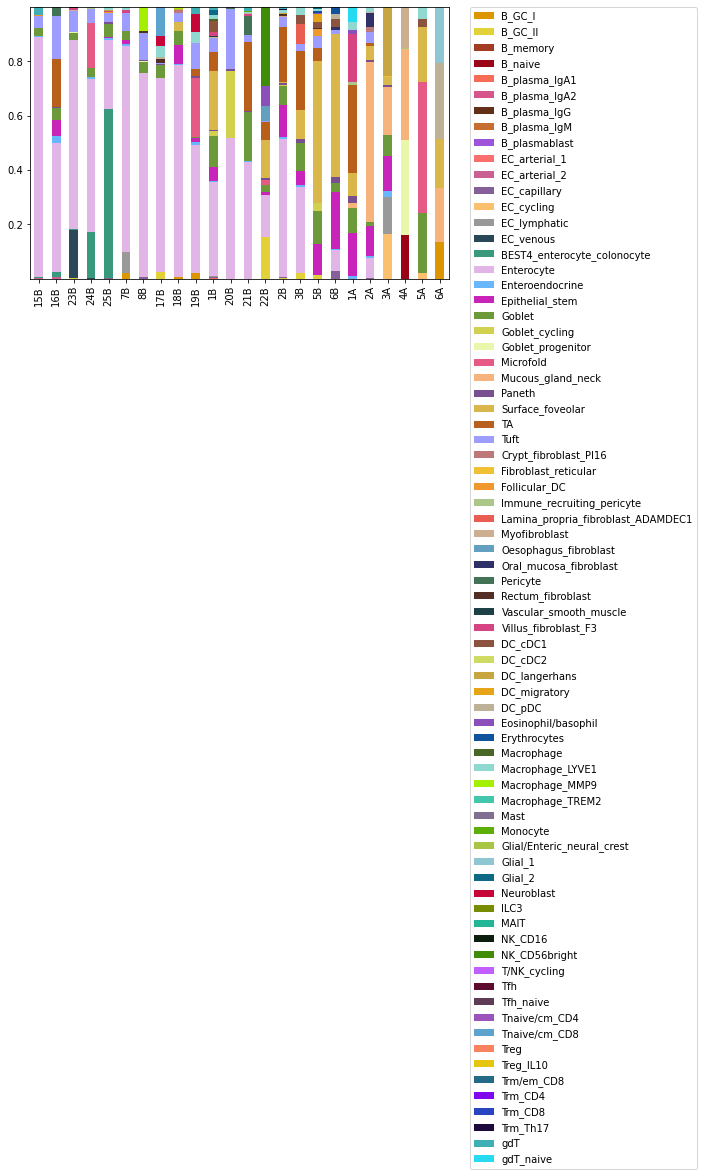

In [288]:
df = GSE126299
df = df[column_order]
df = df.reindex(index_order)
plt.rcParams['figure.figsize'] = [7.5,5]
df.plot.bar(stacked=True,color=level3_palette).legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig('/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/MUC6_proportions/figures/level_3_annot_GSE126299_prop.pdf')

In [289]:
index_rename = { #healthy control
    '15B':'healthy_control','16B':'healthy_control','23B':'healthy_control','24B':'healthy_control','25B':'healthy_control','7B':'healthy_control','8B':'healthy_control',
    #inflamed non-UACL
    '17B':'inflamed_control','18B':'inflamed_control','19B':'inflamed_control','1B':'inflamed_control',
    '20B':'inflamed_control','21B':'inflamed_control','22B':'inflamed_control','2B':'inflamed_control','3B':'inflamed_control','5B':'inflamed_control','6B':'inflamed_control',
    #UACL
    '1A':'pyloric_metaplasia','2A':'pyloric_metaplasia','3A':'pyloric_metaplasia','4A':'pyloric_metaplasia','5A':'pyloric_metaplasia','6A':'pyloric_metaplasia'}

In [290]:
new_df = df.rename(index=index_rename)

In [291]:
new_df

,B_GC_I,B_GC_II,B_memory,B_naive,B_plasma_IgA1,B_plasma_IgA2,B_plasma_IgG,B_plasma_IgM,B_plasmablast,EC_arterial_1,...,Tnaive/cm_CD4,Tnaive/cm_CD8,Treg,Treg_IL10,Trm/em_CD8,Trm_CD4,Trm_CD8,Trm_Th17,gdT,gdT_naive
healthy_control,0.000004,0.000009,0.000008,0.000002,0.000005,0.000004,0.000006,0.000005,0.000004,0.000007,...,0.000005,0.000003,0.000005,0.000004,0.000005,0.000006,0.000007,0.000005,0.030449,0.000003
healthy_control,0.000007,0.000028,0.000011,0.000002,0.000005,0.000005,0.000005,0.000004,0.000006,0.000005,...,0.000006,0.000013,0.000004,0.000006,0.000005,0.000005,0.000006,0.000006,0.000013,0.000004
healthy_control,0.000400,0.001502,0.000002,0.000038,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,...,0.000002,0.000002,0.000001,0.000002,0.000002,0.000001,0.000001,0.000001,0.000002,0.000001
healthy_control,0.000005,0.000007,0.000004,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000004,...,0.000004,0.000002,0.000003,0.000003,0.000003,0.000003,0.000003,0.000005,0.000655,0.000003
healthy_control,0.000504,0.000048,0.000007,0.000003,0.000004,0.000004,0.000003,0.000004,0.000009,0.000006,...,0.000005,0.000005,0.000005,0.000008,0.000007,0.000005,0.000008,0.000008,0.005009,0.000008
healthy_control,0.021670,0.000036,0.000013,0.000003,0.000130,0.000057,0.000031,0.000056,0.000009,0.000010,...,0.000015,0.000007,0.000010,0.000012,0.000010,0.000011,0.000012,0.000007,0.000008,0.000017
healthy_control,0.000010,0.000003,0.000002,0.000002,0.000005,0.000007,0.000004,0.000003,0.000003,0.000004,...,0.000003,0.000002,0.000003,0.000003,0.000002,0.000003,0.000003,0.000003,0.000003,0.000003
inflamed_control,0.000004,0.023170,0.000005,0.000003,0.000003,0.000002,0.000002,0.000002,0.000002,0.000003,...,0.000002,0.106170,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000100,0.000002
inflamed_control,0.005285,0.000014,0.000006,0.000004,0.000009,0.000009,0.000009,0.000009,0.000006,0.000008,...,0.000006,0.000003,0.000005,0.000006,0.000006,0.000006,0.000004,0.000005,0.000013,0.000004
inflamed_control,0.021092,0.000006,0.000003,0.000018,0.000002,0.000002,0.000002,0.000002,0.000003,0.000003,...,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.027941,0.000005


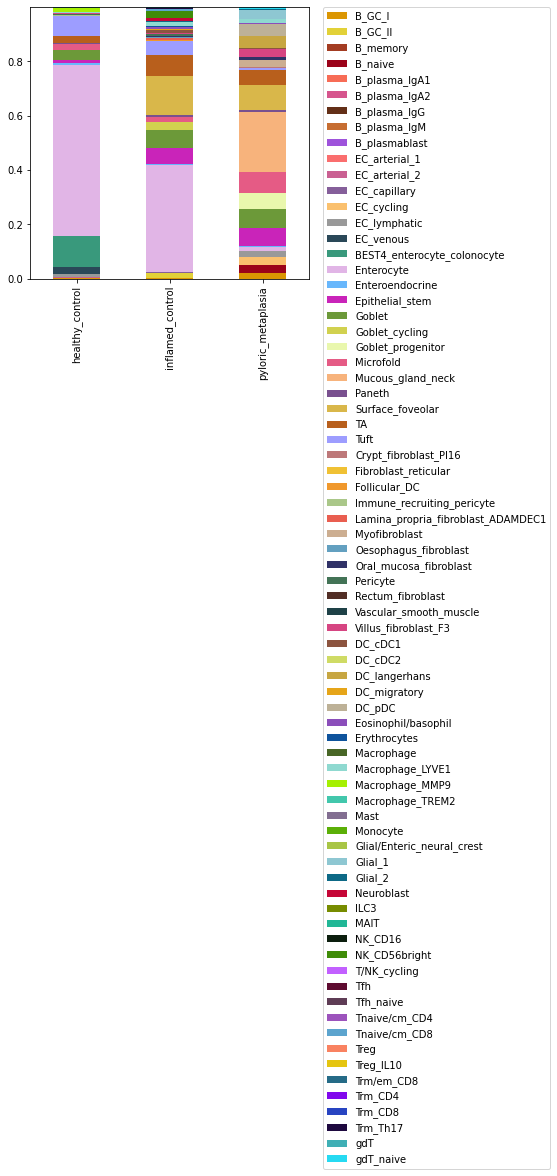

In [292]:
new_df = new_df.groupby(new_df.index).mean()
new_df = new_df.sort_index(ascending=False)
new_df = new_df.reindex(['healthy_control','inflamed_control','pyloric_metaplasia'])
plt.rcParams['figure.figsize'] = [5,5]
new_df.plot.bar(stacked=True,color=level3_palette).legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig('/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/MUC6_proportions/figures/level_3_annot_GSE126299_prop_average.pdf')

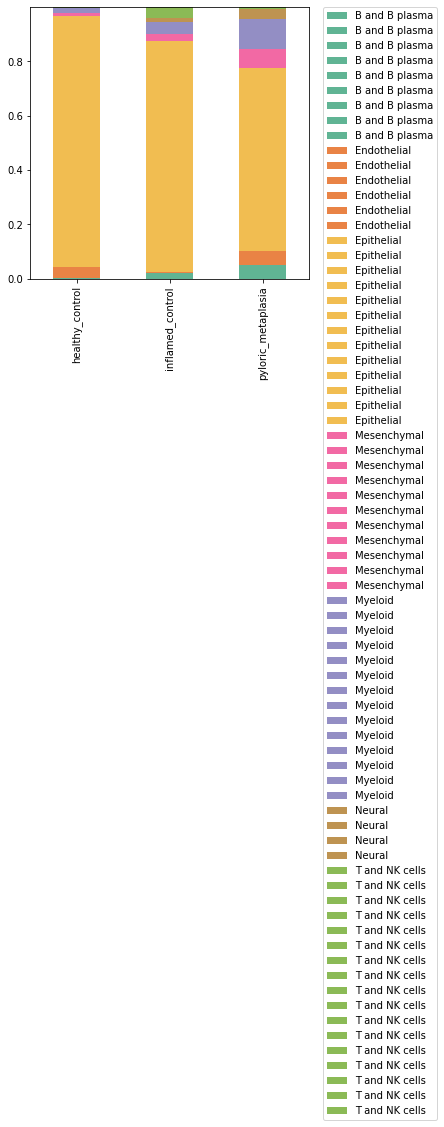

In [295]:
df = new_df.rename(columns=level3_columns)
column_order = ['B and B plasma', 'Endothelial', 'Epithelial',
               'Mesenchymal','Myeloid','Neural','T and NK cells']
df = df[column_order]
plt.rcParams['figure.figsize'] = [5,5]
df.plot.bar(stacked=True,color=level1_palette).legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig('/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/MUC6_proportions/figures/level_1_annot_GSE126299_prop_average.pdf')

In [296]:
adata

AnnData object with n_obs × n_vars = 1358576 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_s

In [297]:
si = adata[adata.obs.organ_groups.isin(['Small_intestine'])].copy()

In [298]:
si

AnnData object with n_obs × n_vars = 515784 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_sp

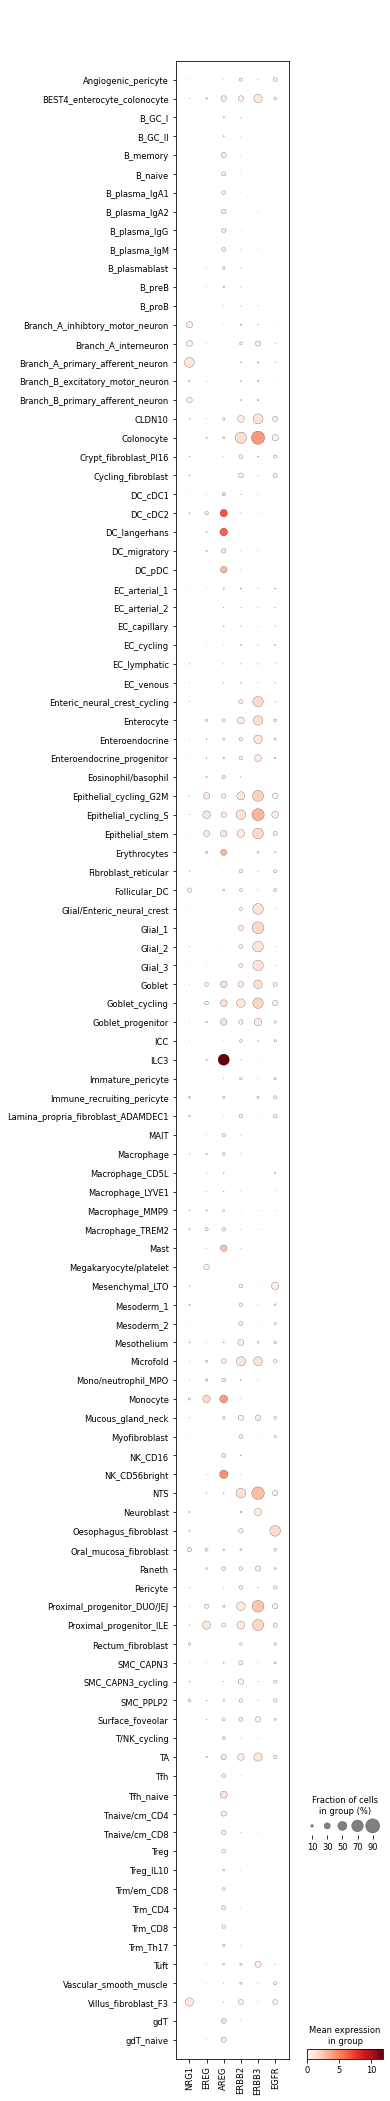

In [303]:
sc.pl.dotplot(si,var_names=['NRG1','EREG','AREG','ERBB2','ERBB3','EGFR'],groupby='level_3_annot')

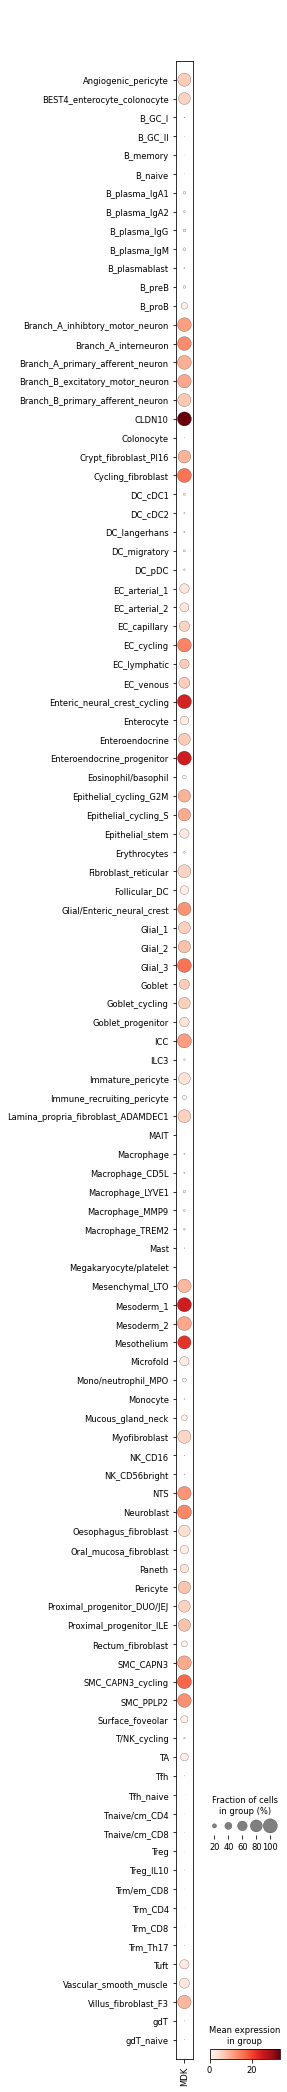

In [310]:
sc.pl.dotplot(si,var_names=['MDK'],groupby='level_3_annot')

In [311]:
si.obs['epi_annot'] = si.obs.level_1_annot

In [316]:
annot = si

In [317]:
annot = annot[annot.obs.level_1_annot.isin(['Epithelial'])]

In [318]:
si.obs.epi_annot.value_counts()

Mesenchymal       161950
Epithelial        125216
T and NK cells    116358
B and B plasma     62693
Myeloid            18844
Neural             15942
Endothelial        14781
Name: epi_annot, dtype: int64

In [319]:
ON = {O:N for O,N in zip(annot.obs_names,annot.obs["level_3_annot"])}
si.obs["epi_annot"] = [ON[O] if O in ON else N for O,N in zip(si.obs_names, si.obs["epi_annot"])]
si.obs.epi_annot.value_counts()

Mesenchymal                    161950
T and NK cells                 116358
Enterocyte                      67022
B and B plasma                  62693
Myeloid                         18844
Neural                          15942
Endothelial                     14781
TA                              11700
Epithelial_stem                  7502
Epithelial_cycling_G2M           6689
Epithelial_cycling_S             6685
Goblet                           5574
Proximal_progenitor_ILE          4349
Proximal_progenitor_DUO/JEJ      3575
BEST4_enterocyte_colonocyte      2509
Goblet_progenitor                2364
Goblet_cycling                   1846
Enteroendocrine                  1502
Tuft                              828
Surface_foveolar                  726
Paneth                            551
Microfold                         494
NTS                               473
CLDN10                            308
Enteroendocrine_progenitor        212
Mucous_gland_neck                 162
Colonocyte  

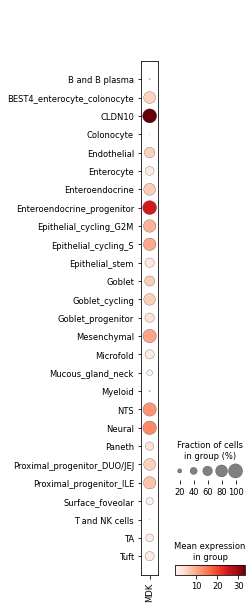

In [321]:
sc.pl.dotplot(si,var_names=['MDK'],groupby='epi_annot')

In [322]:
si_adult = si[~si.obs.donor_category.isin(['inutero','preterm'])]

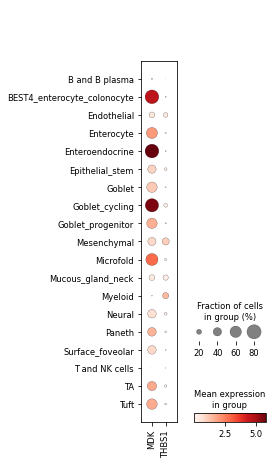

In [324]:
sc.pl.dotplot(si_adult,var_names=['MDK','THBS1'],groupby='epi_annot')

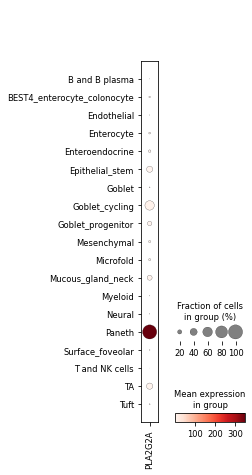

In [325]:
sc.pl.dotplot(si_adult,var_names=['PLA2G2A'],groupby='epi_annot')

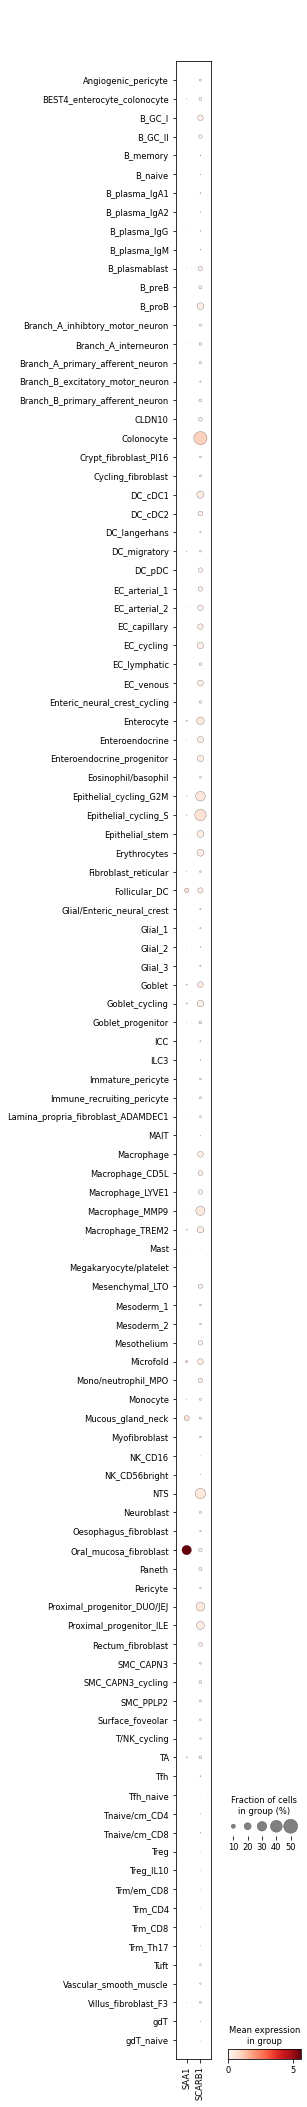

In [304]:
sc.pl.dotplot(si,var_names=['SAA1','SCARB1'],groupby='level_3_annot')

In [305]:
bdata = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/interactions_nichenet/pooled_healthy_disease.plus_additional_epi.18485genes.with_fineannot.nodoublets.smallintestine.for_nichenet.20231122.h5ad')

In [306]:
bdata

AnnData object with n_obs × n_vars = 379713 × 18485
    obs: 'sampleID', 'sourceID', 'study', 'donorID_unified', 'donor_category', 'sex', 'organ_unified', 'organ_groups', 'disease', 'disease_simple', 'level_1_annot', 'level_2_annot', 'level_3_annot'
    var: 'gene_ids', 'feature_type', 'mito', 'ribo', 'hb', 'cc', 'ig', 'tcr', 'n_counts', 'n_counts_raw', 'n_counts_unspliced', 'n_cells', 'n_cells_raw', 'n_cells_spliced', 'n_cells_unspliced'
    uns: 'age_unified_colors', 'control_vs_disease_colors', 'disease_colors', 'level_1_annot_colors', 'level_3_annot_colors', 'log1p', 'neighbors', 'organ_groups_colors', 'organ_unified_colors', 'study_colors', 'umap'
    obsm: 'X_scANVI', 'X_umap'
    layers: 'raw'
    obsp: 'connectivities', 'distances'

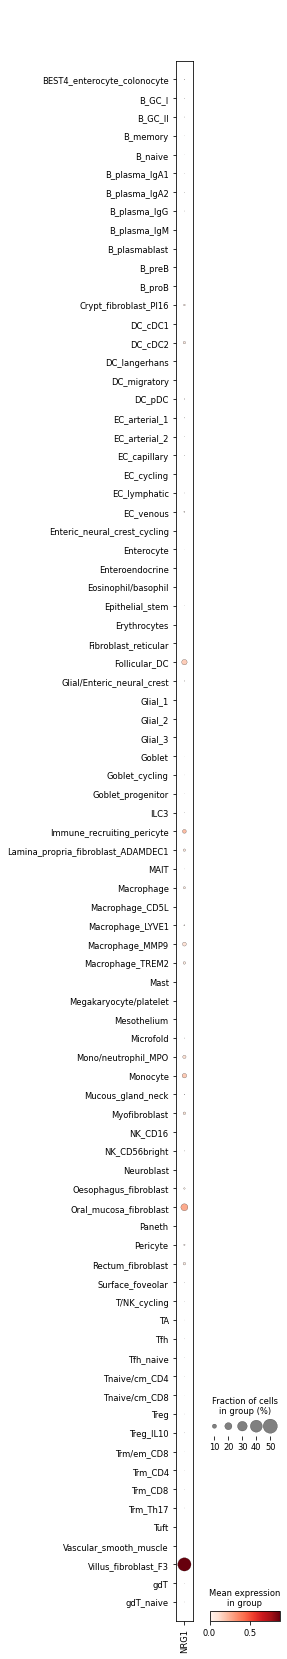

In [308]:
sc.pl.dotplot(bdata,var_names=['NRG1'],groupby='level_3_annot')

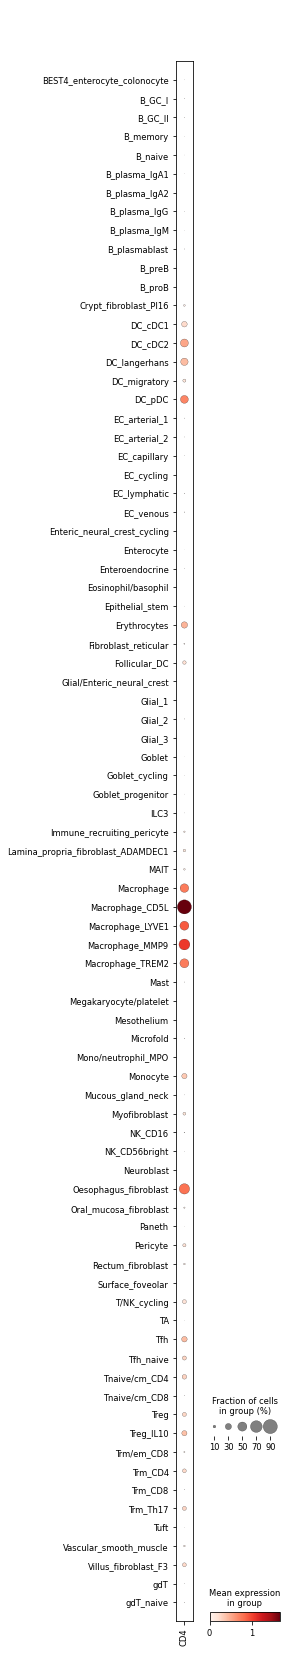

In [309]:
sc.pl.dotplot(bdata,var_names=['CD4'],groupby='level_3_annot')

In [ ]:
#trash

In [ ]:
column_order = [#B and B plasma
    'B_naive',
    'B_memory',
     'B_plasma_IgA2',
 'B_plasma_IgA1',
    'B_plasma_IgG',
     'B_GC_I',
     'B_plasma_IgM',
    'B_plasmablast',
    'B_GC_II',
 'B_preB',
     'B_proB',
    
    #endothelial
    'EC_venous',
 
 'EC_lymphatic',
'EC_arterial_2',
'EC_arterial_1',
 'EC_capillary',
     'EC_cycling',
    
    #epithelial
    'Enterocyte',
     'Goblet_progenitor',
    'TA',
 'Paneth',
    'Goblet_cycling',
     'Epithelial_stem',
     'BEST4_enterocyte_colonocyte',
 'Goblet',
     'Epithelial_cycling_S',
 'Enteroendocrine',
 'Tuft',
 'Mucous_gland_neck',
 'Microfold',
 'Epithelial_cycling_G2M',
 'Surface_foveolar',
'Enteroendocrine_progenitor',
    
    #mesenchymal
     'Myofibroblast',
    'Lamina_propria_fibroblast_ADAMDEC1',
 'Villus_fibroblast_F3',
 'Crypt_fibroblast_PI16',
 'Pericyte',
'Fibroblast_reticular',
     'Oral_mucosa_fibroblast',
 'Mesoderm_2',
 'Vascular_smooth_muscle',
  'Immature_pericyte',
 'Follicular_DC',
 'SMC_PPLP2',
 'Mesenchymal_LTO',
 'Angiogenic_pericyte',
 'Mesothelium',
 'Immune_recruiting_pericyte',
 'Rectum_fibroblast',
    'Cycling_fibroblast',
 'Oesophagus_fibroblast',
 'SMC_CAPN3',
    
    #myeloid
 'DC_cDC2',
     'Monocyte',
     'NK_CD16',
    'Macrophage',
 'DC_migratory',
 'Mast',
 'DC_cDC1',
 'Macrophage_TREM2',
 'Macrophage_LYVE1',
'Macrophage_MMP9',
'DC_langerhans',
    'DC_pDC',
'Eosinophil/basophil',
'Mono/neutrophil_MPO',
 'Megakaryocyte/platelet',
     'Erythrocytes',
    
    #neural
     'Glial_2',
    'Glial/Enteric_neural_crest',
'Neuroblast',
'Glial_3',
 'Glial_1',
'Enteric_neural_crest_cycling',
     'Branch_A_interneuron',
    
    
    #T and NK cells
     'Trm_CD4',
    'Treg_IL10',
 'Tnaive/cm_CD4',
     'Tfh_naive',
 'Trm/em_CD8',
 'gdT',
 'Treg',
     'Trm_CD8',
 'Trm_Th17',
 'gdT_naive',
    'ILC3',
    'Tnaive/cm_CD8',
 'Tfh',
 'T/NK_cycling',
 'MAIT',
     'NK_CD56bright',

]